In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from matplotlib.ticker import MaxNLocator
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
import patsy

### Data Preprocessing

### Border Crossing Data

In [2]:
# Loading the Border Crossing Entry data as a dataframe
data1 = (r'C:\Users\saiha\OneDrive\Desktop\Data Science\Thesis\Border_Crossing_Entry_Data.csv')
border_data = pd.read_csv(data1)
border_data.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Latitude,Longitude,Point
0,Roma,Texas,2310,US-Mexico Border,Dec 2023,Buses,46,26.404,-99.019,POINT (-99.018981 26.403928)
1,Del Rio,Texas,2302,US-Mexico Border,Dec 2023,Trucks,6552,29.327,-100.928,POINT (-100.927612 29.326784)
2,Roma,Texas,2310,US-Mexico Border,Nov 2023,Trucks,3753,26.404,-99.019,POINT (-99.018981 26.403928)
3,Douglas,Arizona,2601,US-Mexico Border,Oct 2023,Buses,13,31.334,-109.560,POINT (-109.560344 31.334043)
4,Beecher Falls,Vermont,206,US-Canada Border,Aug 2023,Trucks,422,45.013,-71.505,POINT (-71.505309 45.013411)


In [3]:
border_data['Measure'].unique()

array(['Buses', 'Trucks', 'Bus Passengers', 'Truck Containers Empty',
       'Trains', 'Pedestrians', 'Personal Vehicles', 'Train Passengers',
       'Truck Containers Loaded', 'Rail Containers Loaded',
       'Rail Containers Empty', 'Personal Vehicle Passengers'],
      dtype=object)

In [4]:
result = border_data.loc[(border_data['Port Name'] == 'Roma') & (border_data['Date'] == 'Dec 2023')]
result

,Port Name,State,Port Code,Border,Date,Measure,Value,Latitude,Longitude,Point
0,Roma,Texas,2310,US-Mexico Border,Dec 2023,Buses,46,26.404,-99.019,POINT (-99.018981 26.403928)
3172,Roma,Texas,2310,US-Mexico Border,Dec 2023,Personal Vehicles,77099,26.404,-99.019,POINT (-99.018981 26.403928)
10594,Roma,Texas,2310,US-Mexico Border,Dec 2023,Truck Containers Empty,594,26.404,-99.019,POINT (-99.018981 26.403928)
13737,Roma,Texas,2310,US-Mexico Border,Dec 2023,Personal Vehicle Passengers,150393,26.404,-99.019,POINT (-99.018981 26.403928)
16593,Roma,Texas,2310,US-Mexico Border,Dec 2023,Bus Passengers,704,26.404,-99.019,POINT (-99.018981 26.403928)
20039,Roma,Texas,2310,US-Mexico Border,Dec 2023,Trucks,3355,26.404,-99.019,POINT (-99.018981 26.403928)
24300,Roma,Texas,2310,US-Mexico Border,Dec 2023,Truck Containers Loaded,5872,26.404,-99.019,POINT (-99.018981 26.403928)
27788,Roma,Texas,2310,US-Mexico Border,Dec 2023,Pedestrians,20183,26.404,-99.019,POINT (-99.018981 26.403928)


In [5]:
border_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394866 entries, 0 to 394865
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Port Name  394866 non-null  object 
 1   State      394866 non-null  object 
 2   Port Code  394866 non-null  int64  
 3   Border     394866 non-null  object 
 4   Date       394866 non-null  object 
 5   Measure    394866 non-null  object 
 6   Value      394866 non-null  int64  
 7   Latitude   394866 non-null  float64
 8   Longitude  394866 non-null  float64
 9   Point      394866 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 30.1+ MB


In [6]:
# Convert Date to datetime format
border_data["Date"] = pd.to_datetime(border_data["Date"], format="%b %Y") 

# split date into year and month
border_data["Year"] = border_data["Date"].dt.year
border_data["Month"] = border_data["Date"].dt.month  

In [7]:
b = border_data.loc[(border_data['Year'] == 2024)]

In [8]:
border_data['Year'].unique()

array([2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013,
       2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002,
       2001, 2000, 1999, 1998, 1997, 1996, 2024], dtype=int64)

Each port has different types of measures and it shows the values of the measures around that time. 

In [9]:
border_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394866 entries, 0 to 394865
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Port Name  394866 non-null  object        
 1   State      394866 non-null  object        
 2   Port Code  394866 non-null  int64         
 3   Border     394866 non-null  object        
 4   Date       394866 non-null  datetime64[ns]
 5   Measure    394866 non-null  object        
 6   Value      394866 non-null  int64         
 7   Latitude   394866 non-null  float64       
 8   Longitude  394866 non-null  float64       
 9   Point      394866 non-null  object        
 10  Year       394866 non-null  int64         
 11  Month      394866 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 36.2+ MB


In [10]:
border_data.isna().sum()

Port Name    0
State        0
Port Code    0
Border       0
Date         0
Measure      0
Value        0
Latitude     0
Longitude    0
Point        0
Year         0
Month        0
dtype: int64

In [11]:
# Get categorical column value counts
border_data["State"].value_counts()
border_data["Measure"].value_counts()
border_data["State"].value_counts()


North Dakota    63741
Washington      50536
Maine           43418
Montana         42382
Texas           41946
Minnesota       26182
New York        24169
Arizona         22091
California      21636
Vermont         18895
Alaska          12762
Michigan        12123
Idaho            7593
New Mexico       7392
Name: State, dtype: int64

In [12]:
border_data.describe()

,Port Code,Value,Latitude,Longitude,Year,Month
count,394866.000000,3.948660e+05,394866.000000,394866.000000,394866.000000,394866.000000
mean,2446.627978,2.882798e+04,43.975078,-99.732194,2008.606044,6.451254
std,1204.088182,1.495966e+05,8.151572,18.258399,7.720236,3.441196
min,101.000000,0.000000e+00,25.952000,-141.001000,1996.000000,1.000000
25%,2304.000000,0.000000e+00,42.999000,-114.728000,2002.000000,3.000000
50%,3012.000000,1.420000e+02,48.122000,-101.628000,2008.000000,6.000000
75%,3401.000000,2.975000e+03,49.000000,-89.585000,2015.000000,9.000000
max,3814.000000,4.447374e+06,62.615000,-66.980000,2024.000000,12.000000


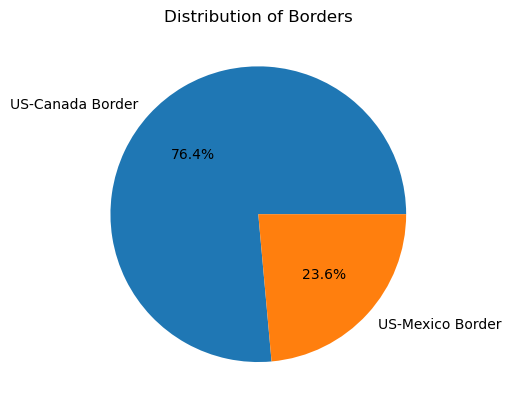

In [13]:
# Distribution of Border
border_data["Border"].value_counts().sort_index().plot(kind="pie", autopct='%1.1f%%',title="Distribution of Borders")
plt.ylabel('')
plt.show()

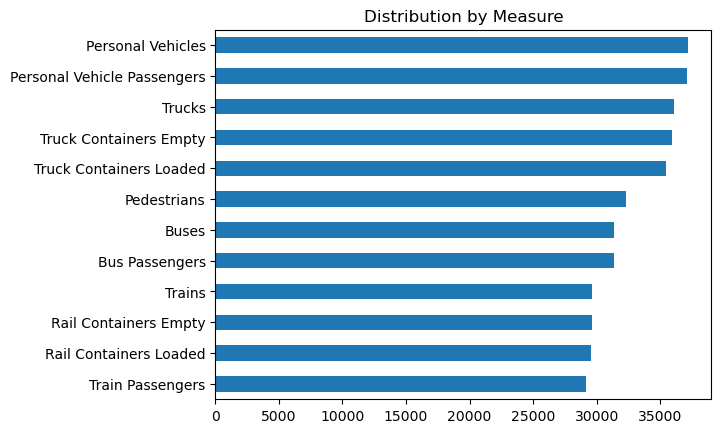

In [14]:
border_data["Measure"].value_counts().sort_values(ascending=True).plot(kind="barh", title="Distribution by Measure")
plt.show()

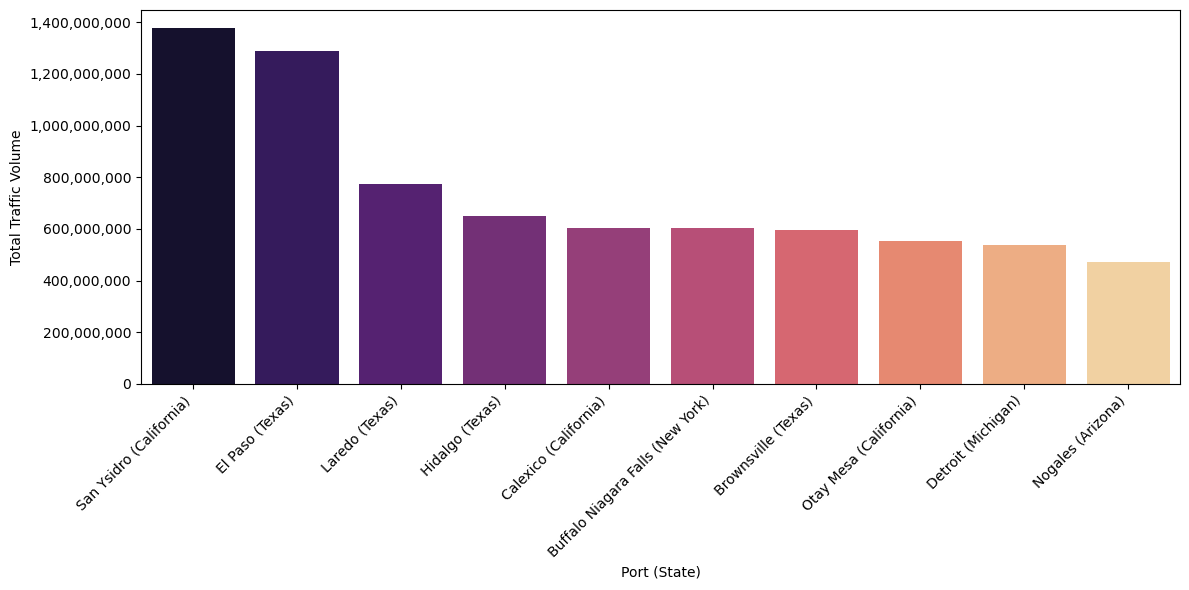

In [15]:
# Group by Port Name and State
top_ports = (
    border_data.groupby(["Port Name", "State"])["Value"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# Create label with the state name next to it
top_ports["Port (State)"] = top_ports["Port Name"] + " (" + top_ports["State"] + ")"

plt.figure(figsize=(12,6))
sns.barplot(x="Port (State)", y="Value", data=top_ports, palette="magma")
plt.xticks(rotation=45, ha="right")
#plt.title("Top 10 Border Ports by Traffic Volume")
plt.ylabel("Total Traffic Volume")
plt.xlabel("Port (State)")

# Format y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.savefig("high_ports.png", dpi=300, bbox_inches="tight")
plt.show()


In [16]:
print(border_data["Value"].max())
print(border_data["Value"].sum())


4447374
11383189161


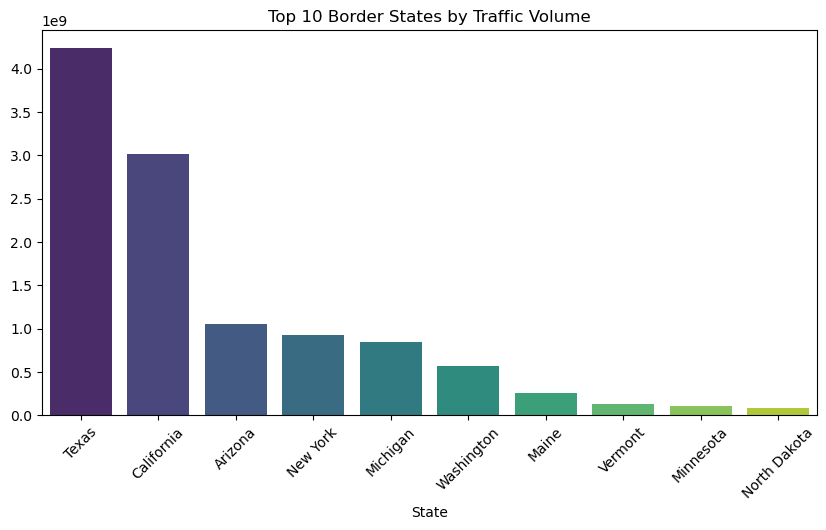

In [17]:
top_10_states = border_data.groupby("State")["Value"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_10_states.index, y=top_10_states.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Top 10 Border States by Traffic Volume")
plt.show()

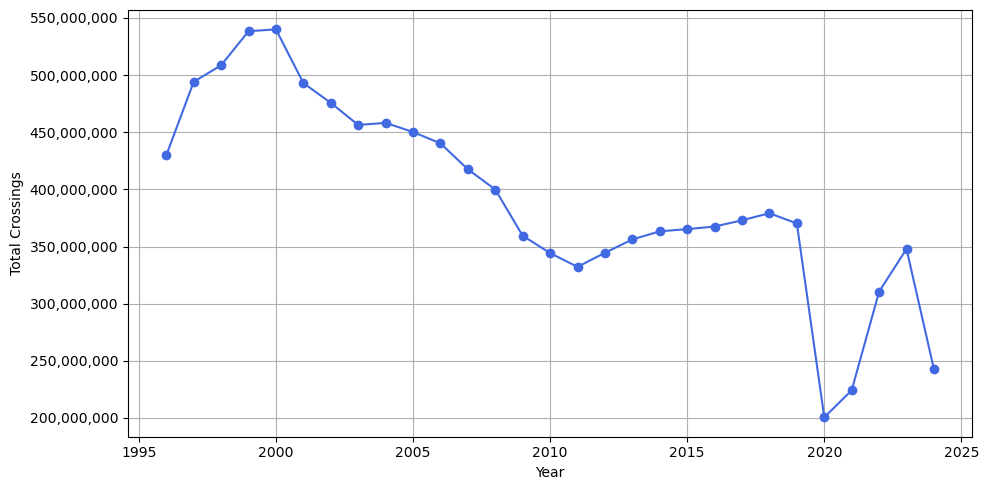

In [18]:
# Group by Year and sum the 'Value'
yearly_traffic = border_data.groupby("Year")["Value"].sum()

# Plot
plt.figure(figsize=(10, 5))
yearly_traffic.plot(kind="line", marker="o", color="royalblue")
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.xlabel("Year")
plt.ylabel("Total Crossings")
plt.grid(True)
plt.tight_layout()
plt.savefig("border_year.png", dpi=300, bbox_inches="tight")
plt.show()


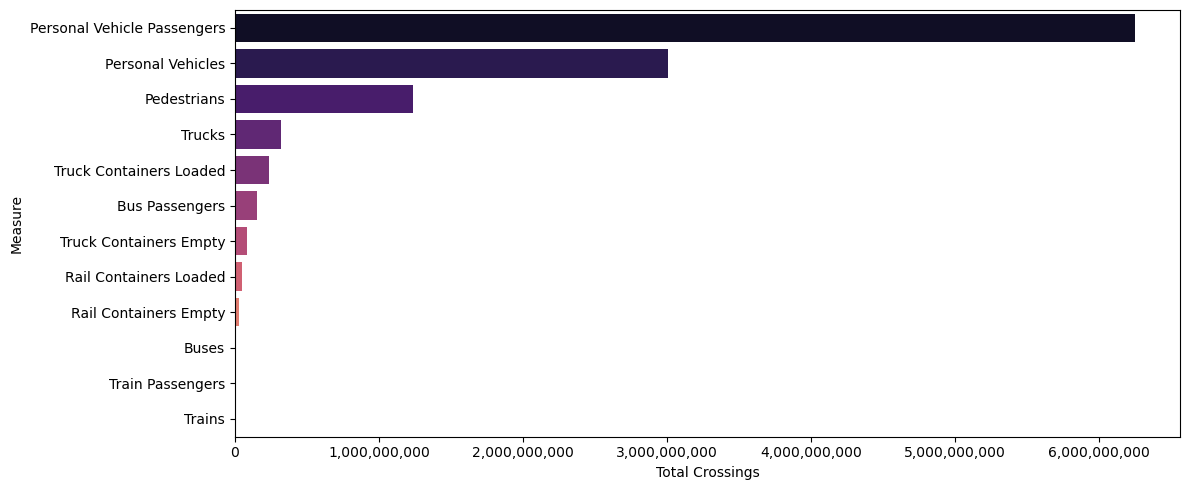

In [19]:
# Total crossings by Measure
measure_counts = border_data.groupby("Measure")["Value"].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 5))
sns.barplot(y=measure_counts.index, x=measure_counts.values, palette="magma", orient="h")
#plt.title("Total Border Crossings by Measure")
plt.xlabel("Total Crossings")
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.tight_layout()
plt.savefig("high_measure.png", dpi=300, bbox_inches="tight")
plt.show()


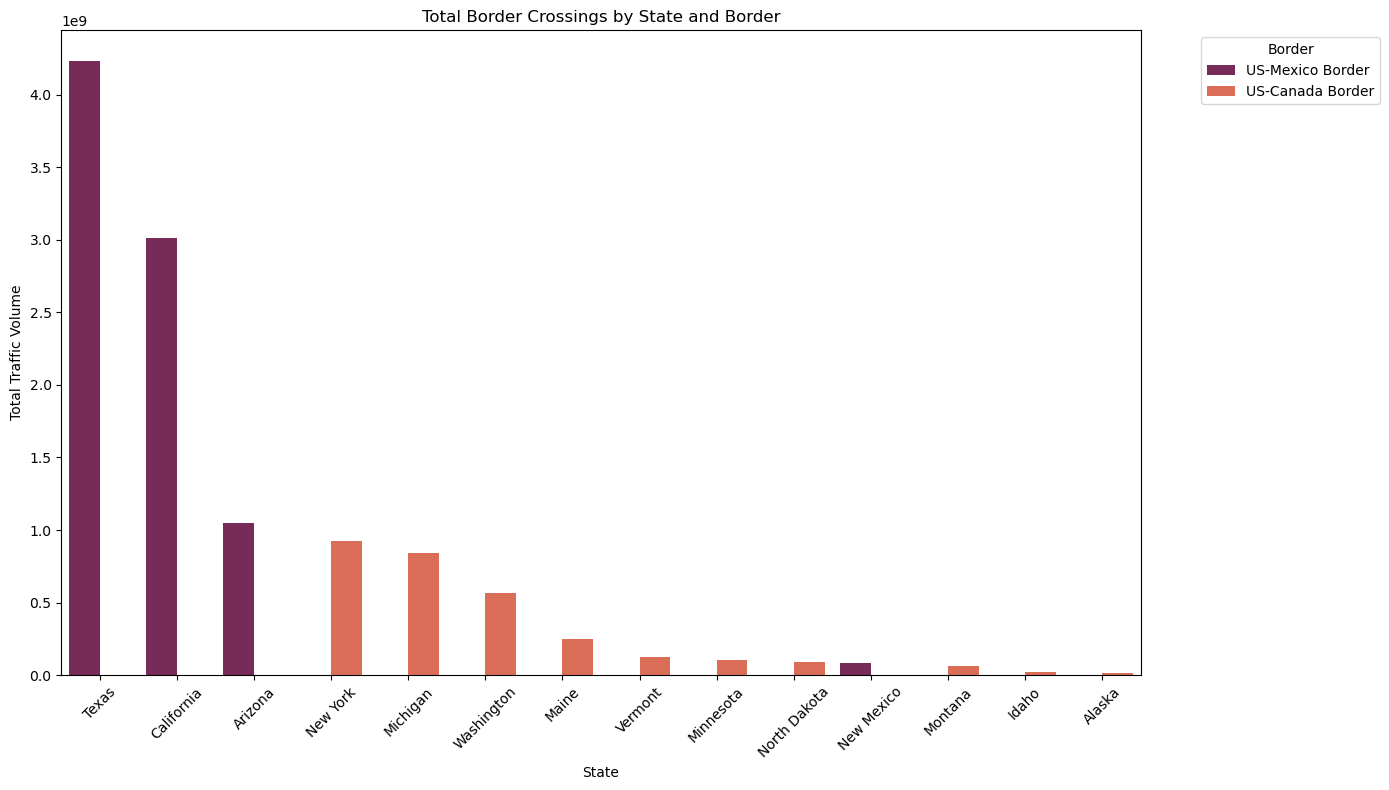

In [20]:
# Grouping by State and Border for total traffic volume
state_border_traffic = border_data.groupby(["State", "Border"])["Value"].sum().reset_index()

# States with the highest total traffic
state_border_traffic_sorted = state_border_traffic.sort_values(by="Value", ascending=False)

# Grouped bar plot showing total traffic volume by state and border
plt.figure(figsize=(14, 8))
sns.barplot(x="State", y="Value", hue="Border", data=state_border_traffic_sorted, palette="rocket")
plt.title("Total Border Crossings by State and Border")
plt.xlabel("State")
plt.ylabel("Total Traffic Volume")
plt.xticks(rotation=45)
plt.legend(title="Border", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

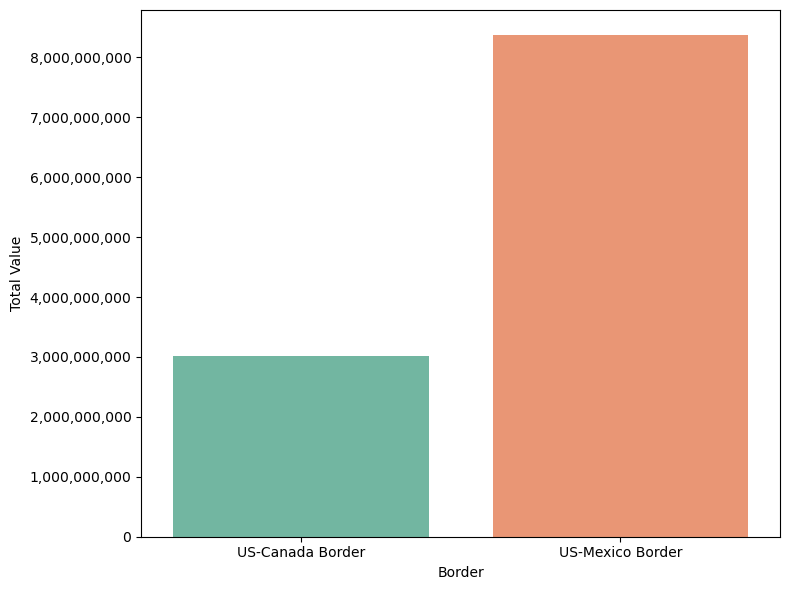

In [21]:
# Grouping Border and Value
border_volumes = border_data.groupby('Border')['Value'].sum().reset_index()

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x='Border', y='Value', data=border_volumes, palette="Set2")
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
#plt.title('Total Border Crossing Volumes by Border')
plt.xlabel('Border')
plt.ylabel('Total Value')
plt.tight_layout()
plt.show()


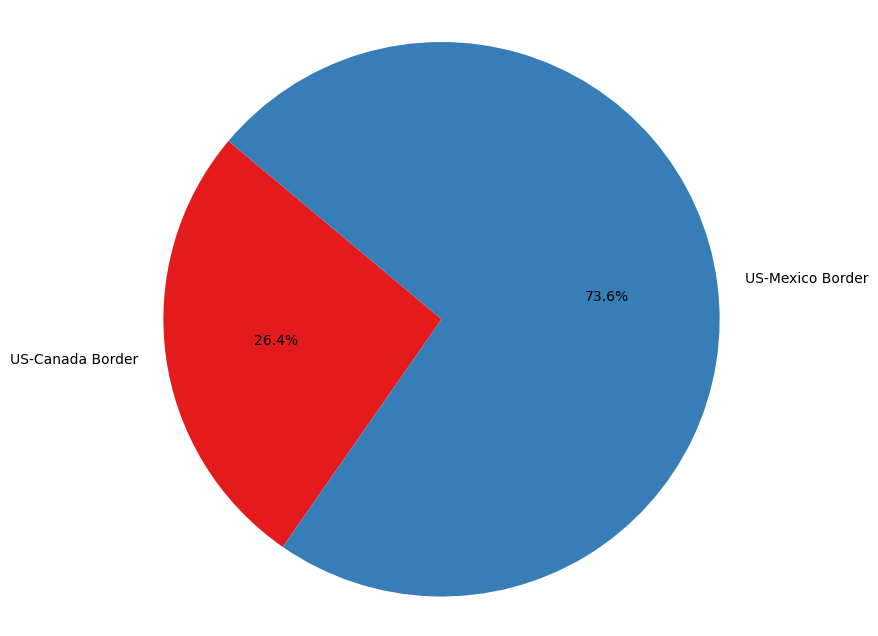

In [22]:
# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    border_volumes['Value'],
    labels=border_volumes['Border'],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Set1.colors  # matches the "Set2" Seaborn palette
)
#plt.title('Total Border Crossing Volumes by Border')
plt.axis('equal')
plt.savefig("compare_pie.png", dpi=300, bbox_inches="tight")
plt.show()


<AxesSubplot:title={'center':'Traffic Volume by Border and Measure Type'}, xlabel='Border'>

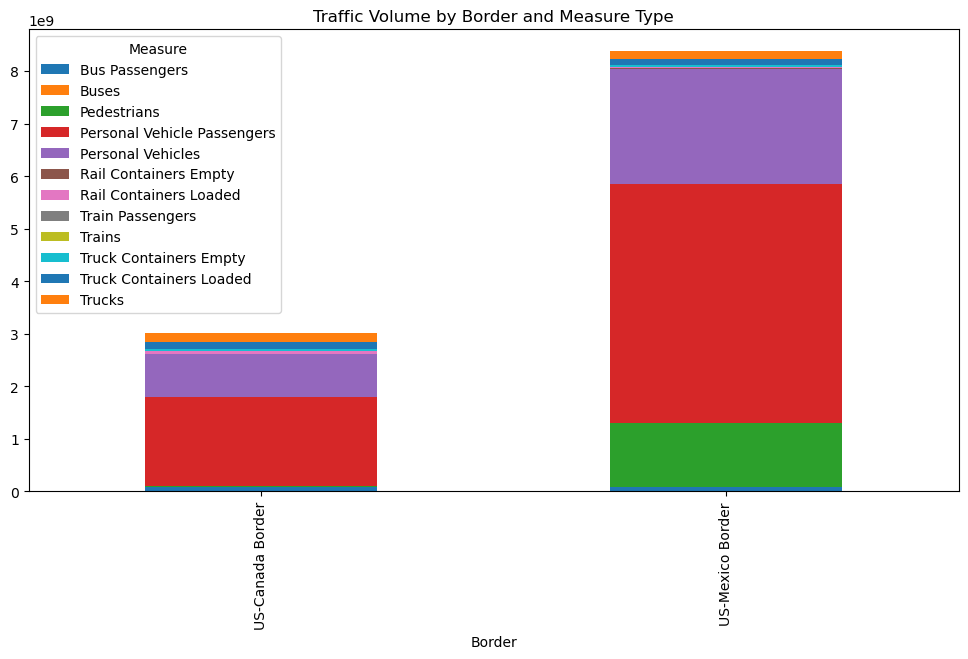

In [23]:
# Traffic Volume by Border and Measure Type
border_measure_volumes = border_data.groupby(['Border', 'Measure'])['Value'].sum().unstack().fillna(0)
border_measure_volumes.plot(kind='bar', stacked=True, figsize=(12, 6), title="Traffic Volume by Border and Measure Type")


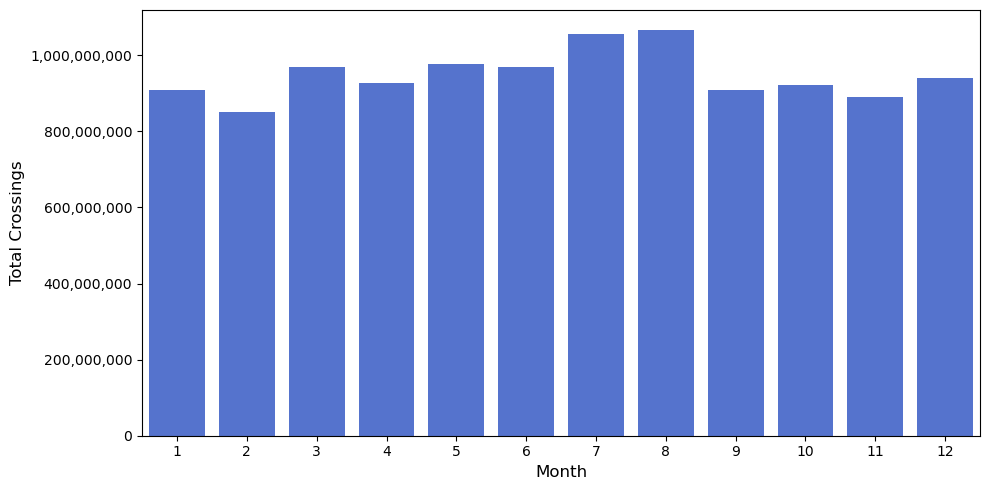

In [24]:
# Group by month and sum values
monthly_volumes = border_data.groupby(border_data['Date'].dt.month)['Value'].sum()

# Create plot
plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_volumes.index, y=monthly_volumes.values, color="royalblue")  # One color
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
#plt.title("Total Border Crossings by Month", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Crossings", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig("border_month.png", dpi=300, bbox_inches="tight")
plt.show()


### Disasters Data

In [25]:
# Loading the disasters data as a dataframe
data2 = (r'C:\Users\saiha\OneDrive\Desktop\Data Science\Thesis\us_disaster_declarations.csv\us_disaster_declarations.csv')
disaster = pd.read_csv(data2)
disaster.head()

,fema_declaration_string,disaster_number,state,declaration_type,declaration_date,fy_declared,incident_type,declaration_title,ih_program_declared,ia_program_declared,...,incident_end_date,disaster_closeout_date,fips,place_code,designated_area,declaration_request_number,last_ia_filing_date,last_refresh,hash,id
0,DR-1-GA,1,GA,DR,1953-05-02T00:00:00Z,1953,Tornado,Tornado,0,1,...,1953-05-02T00:00:00Z,1954-06-01T00:00:00Z,13000,0,Statewide,53013,NaN,2023-03-18T13:22:03Z,48af1afcc4535aa910ddb5b85eebe047dc703a6b,da5c8f17-c28f-4c41-8e06-fa8efc85aa4a
1,DR-2-TX,2,TX,DR,1953-05-15T00:00:00Z,1953,Tornado,Tornado & Heavy Rainfall,0,1,...,1953-05-15T00:00:00Z,1958-01-01T00:00:00Z,48000,0,Statewide,53003,NaN,2023-03-18T13:22:03Z,6bbba411d294ec521683e36313c8da2992e8a857,b0b41f55-0d77-43ac-898c-3cc4a18231e6
2,DR-3-LA,3,LA,DR,1953-05-29T00:00:00Z,1953,Flood,Flood,0,1,...,1953-05-29T00:00:00Z,1960-02-01T00:00:00Z,22000,0,Statewide,53005,NaN,2023-03-18T13:22:03Z,5b2fa18b404bdcf0d3038cd17f1aa995d5412f48,9fd9401d-c76c-43c3-b42a-6a4ae5139ec0
3,DR-4-MI,4,MI,DR,1953-06-02T00:00:00Z,1953,Tornado,Tornado,0,1,...,1953-06-02T00:00:00Z,1956-02-01T00:00:00Z,26000,0,Statewide,53004,NaN,2023-03-18T13:22:03Z,403164346eb22263810402e8b67f1712f1574ad5,67324f38-1f00-4bbc-aeda-5194d1befad6
4,DR-5-MT,5,MT,DR,1953-06-06T00:00:00Z,1953,Flood,Floods,0,1,...,1953-06-06T00:00:00Z,1955-12-01T00:00:00Z,30000,0,Statewide,53006,NaN,2023-03-18T13:22:03Z,8c775d2ce843a8eba2417f9716ba5c75fe0e53f3,e3853916-c7a2-4557-ad8e-60a42d369a61


In [26]:
disaster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64092 entries, 0 to 64091
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   fema_declaration_string     64092 non-null  object
 1   disaster_number             64092 non-null  int64 
 2   state                       64092 non-null  object
 3   declaration_type            64092 non-null  object
 4   declaration_date            64092 non-null  object
 5   fy_declared                 64092 non-null  int64 
 6   incident_type               64092 non-null  object
 7   declaration_title           64092 non-null  object
 8   ih_program_declared         64092 non-null  int64 
 9   ia_program_declared         64092 non-null  int64 
 10  pa_program_declared         64092 non-null  int64 
 11  hm_program_declared         64092 non-null  int64 
 12  incident_begin_date         64092 non-null  object
 13  incident_end_date           55682 non-null  ob

In [27]:
disaster_missing = disaster.isnull().sum()
disaster_missing_percentage = (disaster_missing / len(disaster)) * 100
disaster_missing_data = pd.DataFrame({'Missing Values': disaster_missing, 'Percentage (%)': disaster_missing_percentage})
disaster_missing_data.sort_values(by='Percentage (%)', ascending=False)

,Missing Values,Percentage (%)
last_ia_filing_date,46339,72.300755
disaster_closeout_date,15180,23.684703
incident_end_date,8410,13.121762
fema_declaration_string,0,0.000000
incident_begin_date,0,0.000000
hash,0,0.000000
last_refresh,0,0.000000
declaration_request_number,0,0.000000
designated_area,0,0.000000
place_code,0,0.000000


In [28]:
# Drop columns that have a lot of percentage of missing values
disaster.drop(columns=["last_ia_filing_date", "disaster_closeout_date"], inplace=True)

In [29]:
# Fill incident end date missing values with incident begin date values
disaster["incident_end_date"] = disaster["incident_end_date"].fillna(disaster["incident_begin_date"])

In [30]:
# Drop columns thta are not needed
disaster.drop(columns=["id", "hash", "last_refresh"], inplace=True)

In [31]:
date_cols = ["declaration_date", "incident_begin_date", "incident_end_date"]
for col in date_cols:
    disaster[col] = pd.to_datetime(disaster[col])

In [32]:
disaster['Year'] = disaster['incident_begin_date'].dt.year
disaster['Month'] = disaster['incident_begin_date'].dt.month

In [33]:
(disaster['state'] == 'PW').sum()

1

In [34]:
# Find the index of the row containing "PW" in the "state" column
pw_index = disaster[disaster["state"] == "PW"].index

# Drop the row using the index
disaster.drop(index=pw_index, inplace=True)

In [35]:
disaster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64091 entries, 0 to 64091
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   fema_declaration_string     64091 non-null  object             
 1   disaster_number             64091 non-null  int64              
 2   state                       64091 non-null  object             
 3   declaration_type            64091 non-null  object             
 4   declaration_date            64091 non-null  datetime64[ns, UTC]
 5   fy_declared                 64091 non-null  int64              
 6   incident_type               64091 non-null  object             
 7   declaration_title           64091 non-null  object             
 8   ih_program_declared         64091 non-null  int64              
 9   ia_program_declared         64091 non-null  int64              
 10  pa_program_declared         64091 non-null  int64         

In [36]:
disaster.head()

,fema_declaration_string,disaster_number,state,declaration_type,declaration_date,fy_declared,incident_type,declaration_title,ih_program_declared,ia_program_declared,pa_program_declared,hm_program_declared,incident_begin_date,incident_end_date,fips,place_code,designated_area,declaration_request_number,Year,Month
0,DR-1-GA,1,GA,DR,1953-05-02 00:00:00+00:00,1953,Tornado,Tornado,0,1,1,1,1953-05-02 00:00:00+00:00,1953-05-02 00:00:00+00:00,13000,0,Statewide,53013,1953,5
1,DR-2-TX,2,TX,DR,1953-05-15 00:00:00+00:00,1953,Tornado,Tornado & Heavy Rainfall,0,1,1,1,1953-05-15 00:00:00+00:00,1953-05-15 00:00:00+00:00,48000,0,Statewide,53003,1953,5
2,DR-3-LA,3,LA,DR,1953-05-29 00:00:00+00:00,1953,Flood,Flood,0,1,1,1,1953-05-29 00:00:00+00:00,1953-05-29 00:00:00+00:00,22000,0,Statewide,53005,1953,5
3,DR-4-MI,4,MI,DR,1953-06-02 00:00:00+00:00,1953,Tornado,Tornado,0,1,1,1,1953-06-02 00:00:00+00:00,1953-06-02 00:00:00+00:00,26000,0,Statewide,53004,1953,6
4,DR-5-MT,5,MT,DR,1953-06-06 00:00:00+00:00,1953,Flood,Floods,0,1,1,1,1953-06-06 00:00:00+00:00,1953-06-06 00:00:00+00:00,30000,0,Statewide,53006,1953,6


In [37]:
# Change column name for border data
border_data.rename(columns={'State': 'state'}, inplace=True)

In [38]:
# Mapping for state abbreviations to full names
abbrev_to_full_mapping = {
    "AL": "Alabama", "AK": "Alaska", "AZ": "Arizona", "AR": "Arkansas", "CA": "California",
    "CO": "Colorado", "CT": "Connecticut", "DE": "Delaware", "FL": "Florida", "GA": "Georgia",
    "HI": "Hawaii", "ID": "Idaho", "IL": "Illinois", "IN": "Indiana", "IA": "Iowa", "KS": "Kansas",
    "KY": "Kentucky", "LA": "Louisiana", "ME": "Maine", "MD": "Maryland", "MA": "Massachusetts",
    "MI": "Michigan", "MN": "Minnesota", "MS": "Mississippi", "MO": "Missouri", "MT": "Montana",
    "NE": "Nebraska", "NV": "Nevada", "NH": "New Hampshire", "NJ": "New Jersey", "NM": "New Mexico",
    "NY": "New York", "NC": "North Carolina", "ND": "North Dakota", "OH": "Ohio", "OK": "Oklahoma",
    "OR": "Oregon", "PA": "Pennsylvania", "RI": "Rhode Island", "SC": "South Carolina", "SD": "South Dakota",
    "TN": "Tennessee", "TX": "Texas", "UT": "Utah", "VT": "Vermont", "VA": "Virginia", "WA": "Washington",
    "WV": "West Virginia", "WI": "Wisconsin", "WY": "Wyoming"
}

# Apply mapping on disaster state column to get full names for abbreviations
disaster['state'] = disaster['state'].map(abbrev_to_full_mapping)


In [39]:
(disaster['state'] == 'PW').sum()

0

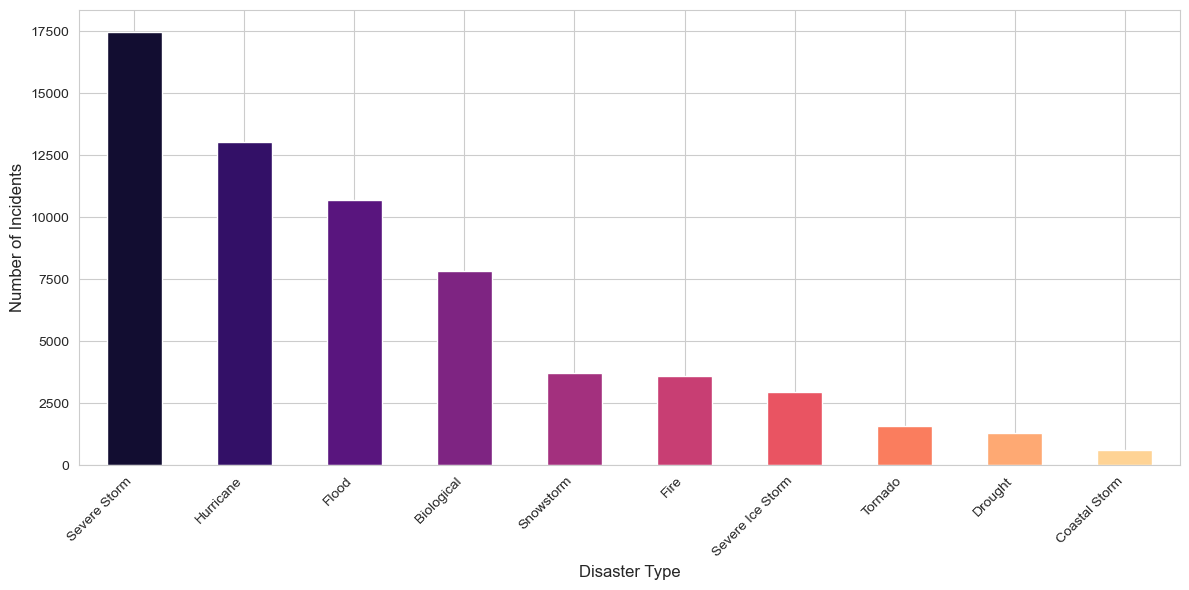

In [40]:
sns.set_style("whitegrid")

# Get top 10 disaster types
top_10_disasters = disaster["incident_type"].value_counts().sort_values(ascending=False).head(10)
colors = sns.color_palette("magma", len(top_10_disasters))

# Plot
plt.figure(figsize=(12, 6))
top_10_disasters.plot(kind="bar", color=colors)
#plt.title("Top 10 Disaster Types", fontsize=14)
plt.xlabel("Disaster Type", fontsize=12)
plt.ylabel("Number of Incidents", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("disaser_count.png", dpi=300, bbox_inches="tight")
plt.show()


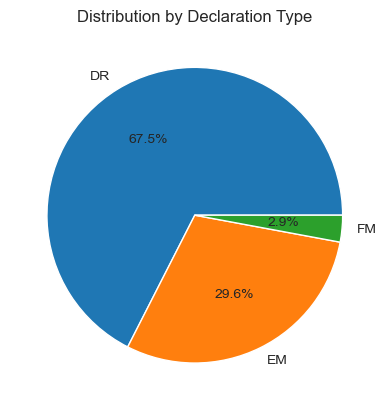

In [41]:
disaster["declaration_type"].value_counts().plot(kind="pie", autopct='%1.1f%%', title="Distribution by Declaration Type")
plt.ylabel('')  # Remove the default ylabel
plt.show()

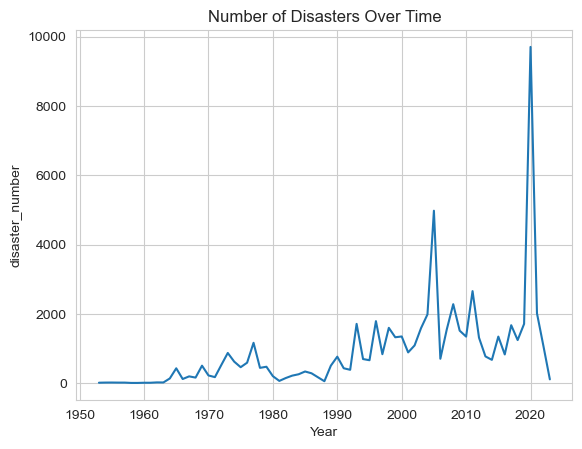

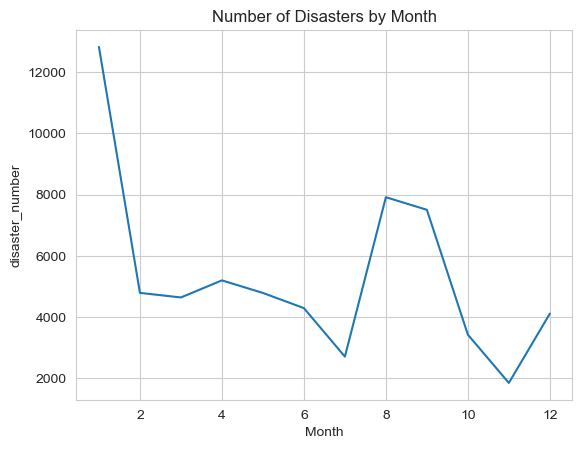

In [42]:
# Group by year and count disasters
yearly_disasters = disaster.groupby('Year')['disaster_number'].count().reset_index()
sns.lineplot(x='Year', y='disaster_number', data=yearly_disasters)
plt.title('Number of Disasters Over Time')
plt.show()

# Group by month
monthly_disasters = disaster.groupby('Month')['disaster_number'].count().reset_index()
sns.lineplot(x='Month', y='disaster_number', data=monthly_disasters)
plt.title('Number of Disasters by Month')
plt.show()


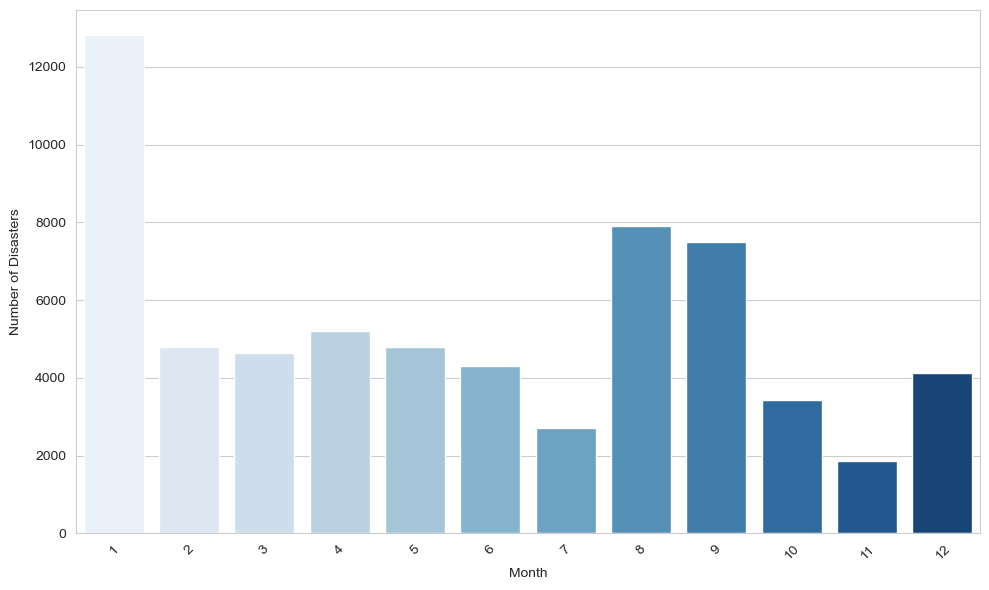

In [43]:
# Group by month
monthly_disasters = disaster.groupby('Month')['disaster_number'].count().reset_index()

# Plot as bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='disaster_number', data=monthly_disasters, palette='Blues')
#plt.title('Number of Disasters by Month')
plt.xlabel('Month')
plt.ylabel('Number of Disasters')
plt.xticks(rotation=45)  # Optional: Rotate labels if needed
plt.tight_layout()
plt.savefig("month_dis.png", dpi=300, bbox_inches="tight")
plt.show()


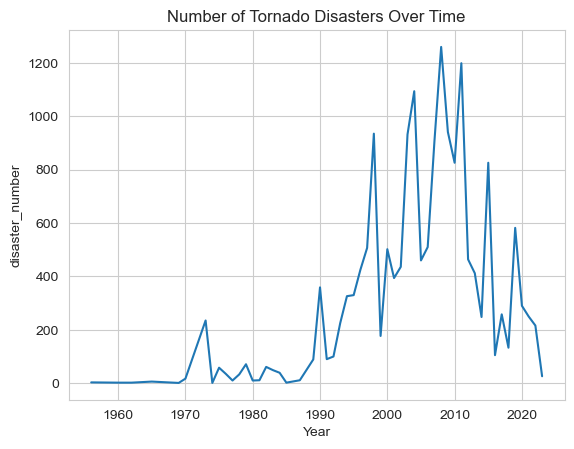

In [44]:
# Filter for a specific incident type
tornado_disasters = disaster[disaster['incident_type'] == 'Severe Storm']
tornado_yearly = tornado_disasters.groupby('Year')['disaster_number'].count().reset_index()

sns.lineplot(x='Year', y='disaster_number', data=tornado_yearly)
plt.title('Number of Tornado Disasters Over Time')
plt.show()


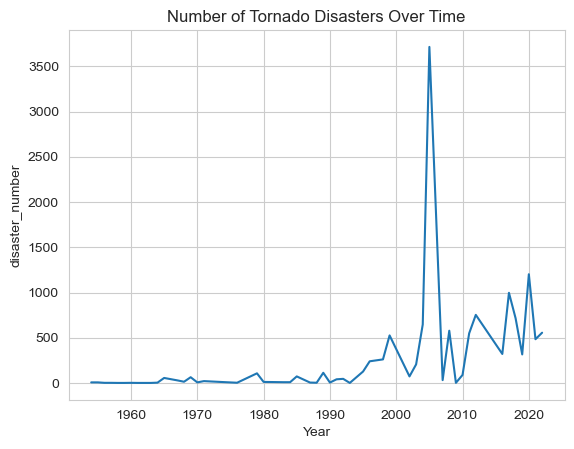

In [45]:
# Filter for a specific incident type
tornado_disasters = disaster[disaster['incident_type'] == 'Hurricane']
tornado_yearly = tornado_disasters.groupby('Year')['disaster_number'].count().reset_index()

sns.lineplot(x='Year', y='disaster_number', data=tornado_yearly)
plt.title('Number of Tornado Disasters Over Time')
plt.show()


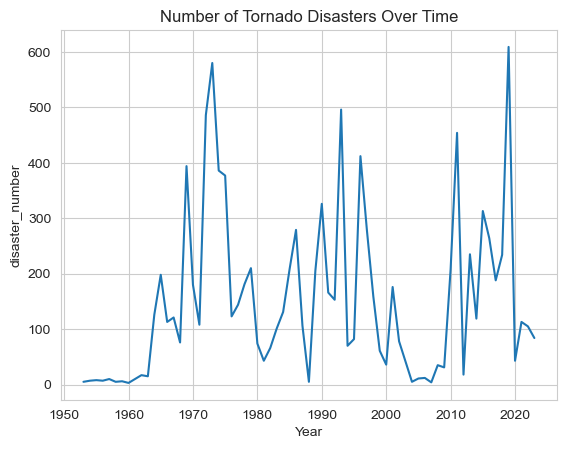

In [46]:
# Filter for a specific incident type
tornado_disasters = disaster[disaster['incident_type'] == 'Flood']
tornado_yearly = tornado_disasters.groupby('Year')['disaster_number'].count().reset_index()

sns.lineplot(x='Year', y='disaster_number', data=tornado_yearly)
plt.title('Number of Tornado Disasters Over Time')
plt.show()


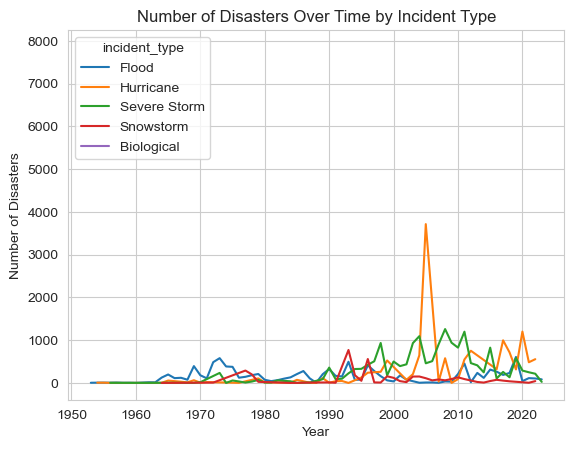

In [47]:
# Filter for multiple incident types
disasters_filtered = disaster[disaster['incident_type'].isin(['Flood', 'Hurricane', 'Severe Storm', "Biological", "Snowstorm"])]

# Group by year and incident type
disasters_yearly = disasters_filtered.groupby(['Year', 'incident_type'])['disaster_number'].count().reset_index()

# Plotting
sns.lineplot(x='Year', y='disaster_number', hue='incident_type', data=disasters_yearly)
plt.title('Number of Disasters Over Time by Incident Type')
plt.xlabel('Year')
plt.ylabel('Number of Disasters')
plt.show()


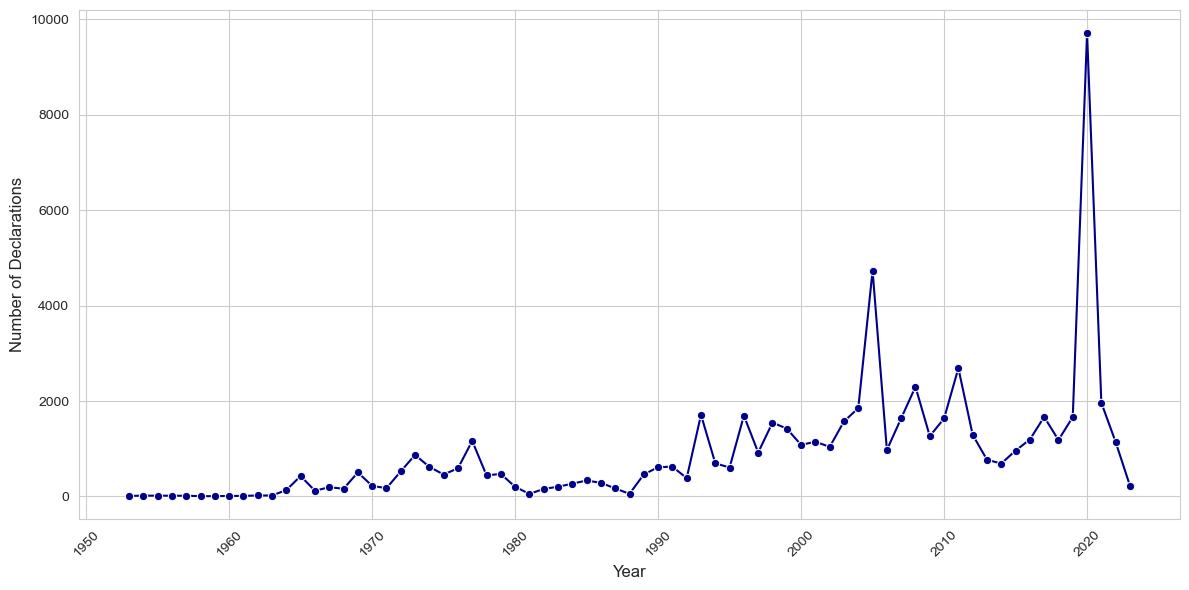

In [48]:
disaster['declaration_date'] = pd.to_datetime(disaster['declaration_date'], errors='coerce')
disaster['year_declared'] = disaster['declaration_date'].dt.year

# Count declarations per year
yearly_counts = disaster['year_declared'].value_counts().sort_index()

# Plot
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker='o', color='darkblue')
#plt.title("Number of Disaster Declarations per Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Declarations", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("declarations_by_year.png", dpi=300, bbox_inches="tight")
plt.show()


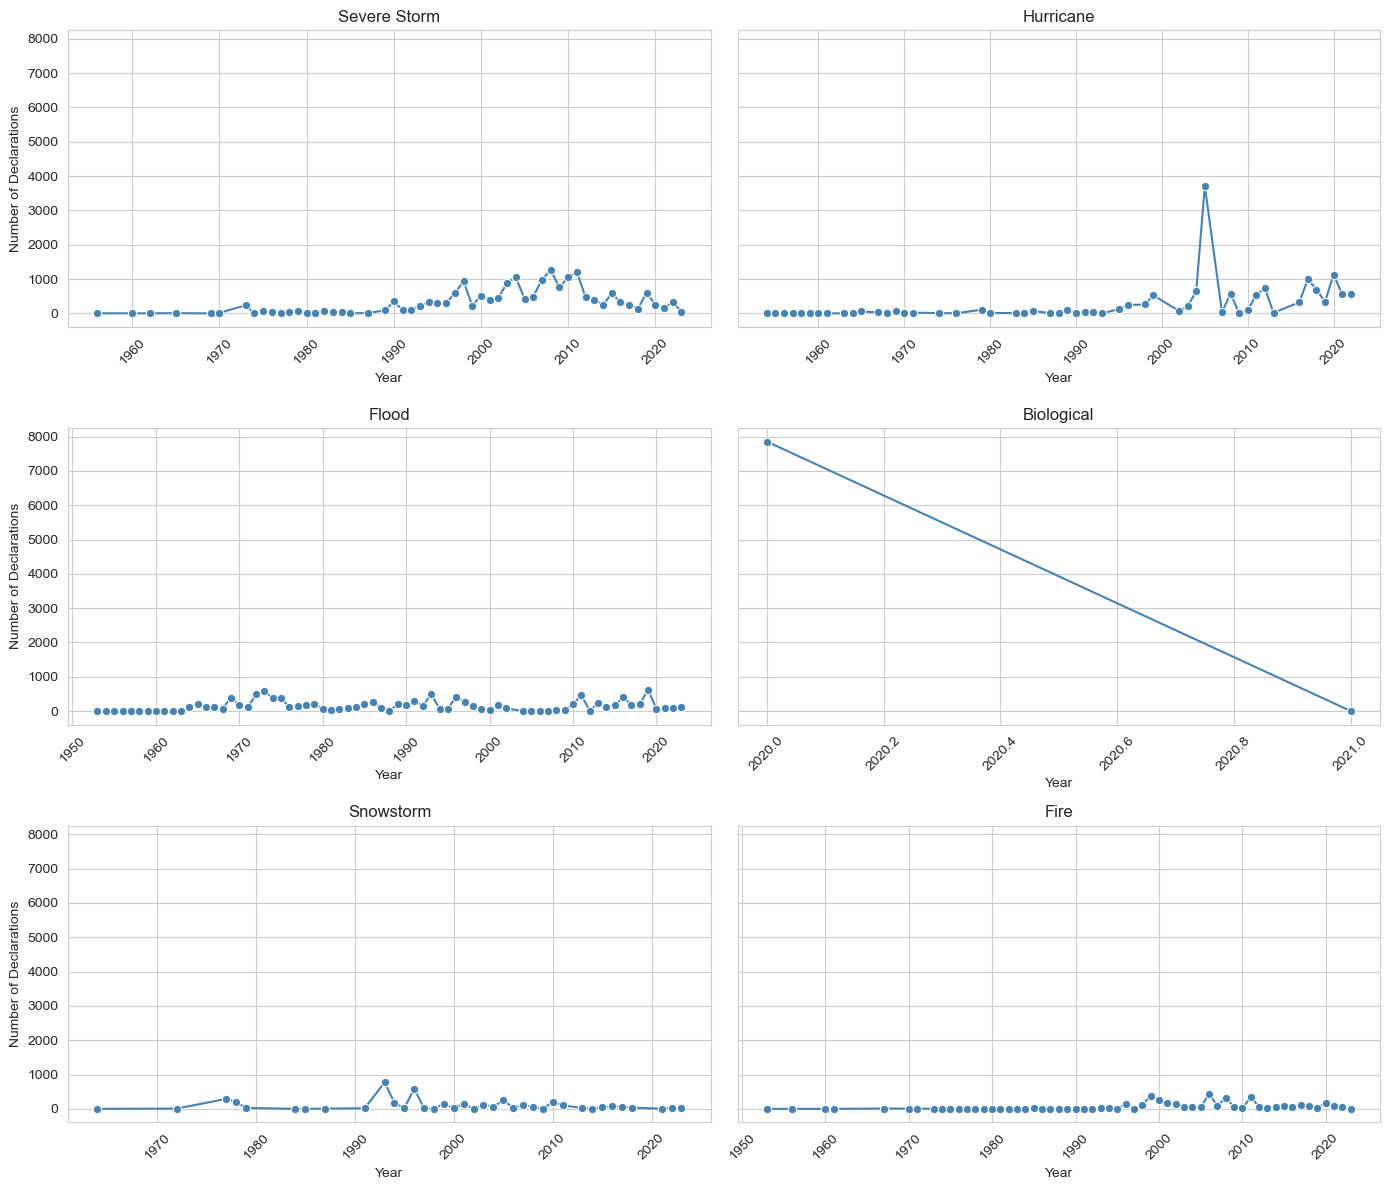

In [49]:
# Make sure declaration_date is datetime
disaster['declaration_date'] = pd.to_datetime(disaster['declaration_date'], errors='coerce')

# Extract year
disaster['year_declared'] = disaster['declaration_date'].dt.year

# Get top 6 incident types
top_6_incidents = disaster['incident_type'].value_counts().head(6).index
fig, axes = plt.subplots(3, 2, figsize=(14, 12), sharey=True)
sns.set_style("whitegrid")
axes = axes.flatten()

# Loop and plot for each top incident type
for i, incident in enumerate(top_6_incidents):
    filtered = disaster[disaster['incident_type'] == incident]
    yearly_counts = filtered['year_declared'].value_counts().sort_index()
    
    sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker='o', ax=axes[i], color='steelblue')
    axes[i].set_title(incident, fontsize=12)
    axes[i].set_xlabel("Year", fontsize=10)
    if i % 2 == 0:
        axes[i].set_ylabel("Number of Declarations", fontsize=10)
    else:
        axes[i].set_ylabel("")

    axes[i].tick_params(axis='x', rotation=45)

# Hide any unused subplots (in case there are fewer than 6)
for j in range(len(top_6_incidents), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
#plt.suptitle("Disaster Declarations by Year for Top 6 Incident Types", fontsize=16, y=1.03)
plt.savefig("declarations_type_year.png", dpi=300, bbox_inches="tight")
plt.show()


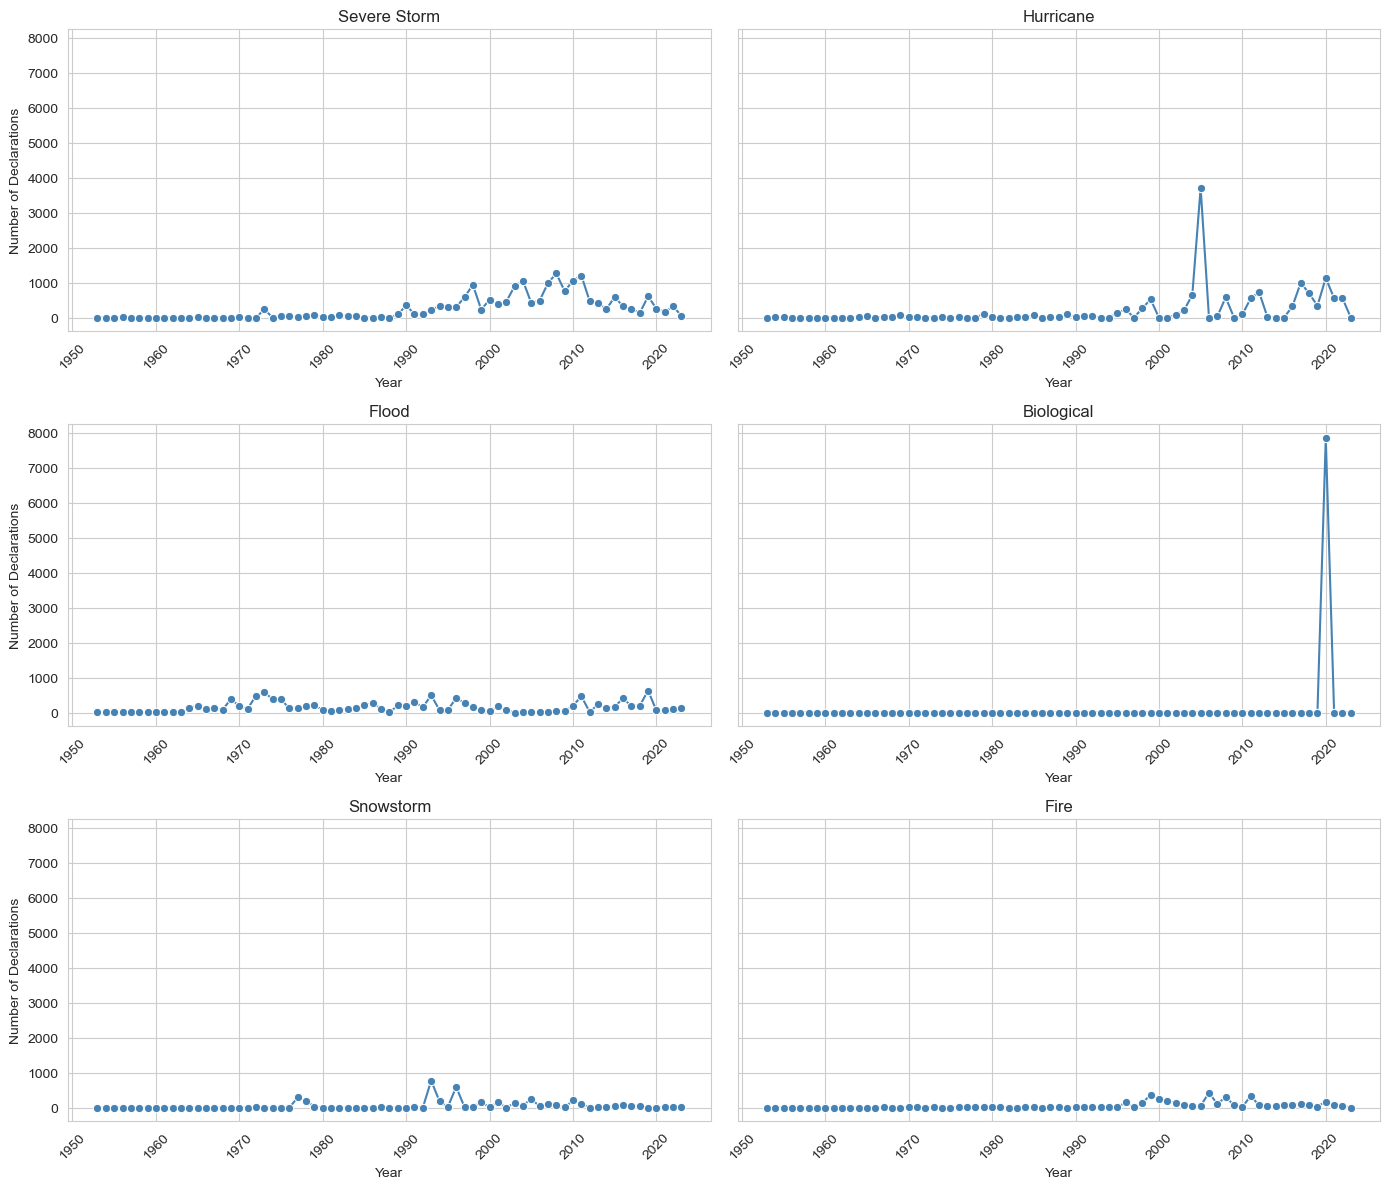

In [50]:
# Extract and clean year
disaster['year_declared'] = disaster['declaration_date'].dt.year.astype('Int64')

# Define consistent year range for all plots
min_year = disaster['year_declared'].min()
max_year = disaster['year_declared'].max()
year_range = range(min_year, max_year + 1)

# Get top 6 incident types
top_6_incidents = disaster['incident_type'].value_counts().head(6).index

fig, axes = plt.subplots(3, 2, figsize=(14, 12), sharey=True)
sns.set_style("whitegrid")
axes = axes.flatten()

# Loop and plot for each top incident type
for i, incident in enumerate(top_6_incidents):
    filtered = disaster[disaster['incident_type'] == incident]
    yearly_counts = (
        filtered['year_declared']
        .value_counts()
        .reindex(year_range, fill_value=0)
        .sort_index()
    )

    sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker='o', ax=axes[i], color='steelblue')
    axes[i].set_title(incident, fontsize=12)
    axes[i].set_xlabel("Year", fontsize=10)
    axes[i].tick_params(axis='x', rotation=45)

    if i % 2 == 0:
        axes[i].set_ylabel("Number of Declarations", fontsize=10)
    else:
        axes[i].set_ylabel("")

# Hide any unused subplots (in case there are fewer than 6)
for j in range(len(top_6_incidents), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig("declarations_type_year.png", dpi=300, bbox_inches="tight")
plt.show()


### Joining Data

In [51]:
disaster_filtered = disaster[disaster["declaration_type"].isin(["DR", "EM", "FM"])]
disaster_agg_text = disaster_filtered.groupby(["state", "Year", "Month"], as_index=False).agg({
    "incident_type": lambda x: ", ".join(x.unique()),  # Combine incident types into a string
    "disaster_number": "nunique",  # Count unique disasters
    "declaration_type": lambda x: ", ".join(x.unique()),  # Combine declaration types
    "designated_area": lambda x: ", ".join(x.unique())  # Preserve designated area info
})

# Merge with border data
combined_text_df = pd.merge(
    border_data,
    disaster_agg_text,
    on=["state", "Year", "Month"],
    how="left"
)


In [52]:
# Drop missing values for merged data
clean_data = combined_text_df.dropna()
border_disaster = clean_data[['Port Name', 'state', 'Border', 'Year', 'Month', 'Measure', 'Value', 'incident_type', 'disaster_number',  'declaration_type', 'designated_area']]
border_disaster

,Port Name,state,Border,Year,Month,Measure,Value,incident_type,disaster_number,declaration_type,designated_area
18,Norton,Vermont,US-Canada Border,2022,12,Trucks,338,Severe Storm,1.0,DR,"Chittenden (County), Essex (County), Franklin ..."
25,Alcan,Alaska,US-Canada Border,2022,9,Buses,1,Severe Storm,1.0,DR,Pribilof Island Regional Educational Attendanc...
28,Skagway,Alaska,US-Canada Border,2022,6,Trucks,266,Fire,1.0,FM,"Denali (Borough), Yukon-Koyukuk (Census Area)"
29,Alcan,Alaska,US-Canada Border,2022,5,Personal Vehicles,5252,"Mud/Landslide, Flood",2.0,DR,"Kenai Peninsula (Borough), Iditarod Area Regio..."
42,Douglas,Arizona,US-Mexico Border,2021,7,Pedestrians,24290,Flood,1.0,DR,"Apache (County), Coconino (County), Navajo (Co..."
...,...,...,...,...,...,...,...,...,...,...,...
388795,Antler,North Dakota,US-Canada Border,1997,2,Truck Containers Empty,0,Flood,1.0,DR,"Adams (County), Barnes (County), Benson (Count..."
388797,Presidio,Texas,US-Mexico Border,1996,4,Truck Containers Loaded,162,Fire,10.0,FM,Statewide
388817,Portland,Maine,US-Canada Border,1996,4,Rail Containers Loaded,0,Severe Storm,1.0,DR,"Androscoggin (County), Cumberland (County), Kn..."
388820,Westhope,North Dakota,US-Canada Border,1996,3,Trains,0,Severe Storm,1.0,DR,"Barnes (County), Benson (County), Burleigh (Co..."


In [53]:
# Expand incident types into separate rows
disaster_expanded = disaster_filtered.assign(
    incident_type=disaster_filtered["incident_type"].str.split(", ")
).explode("incident_type")

# One-hot encode incident types
incident_dummies = pd.get_dummies(disaster_expanded["incident_type"], prefix="Incident")

# Combine one-hot encoded values with original dataset
disaster_encoded = pd.concat([disaster_expanded, incident_dummies], axis=1)

# Aggregate by state, year, and month (one-hot encoded version)
disaster_agg_ohe = disaster_encoded.groupby(["state", "Year", "Month"], as_index=False).agg(
    {
        "disaster_number": "nunique",  # Count unique disasters
        "declaration_type": lambda x: ", ".join(x.unique()),  # Combine declaration types
        "designated_area": lambda x: ", ".join(x.unique()),  # Preserve designated area info
        **{col: "sum" for col in incident_dummies.columns},  # Sum one-hot encoded values
    }
)

# Merge with border data
combined_ohe_df = pd.merge(
    border_data,
    disaster_agg_ohe,
    on=["state", "Year", "Month"],
    how="left"
)


In [54]:
# Drop missing values for merged data
clean_data = combined_ohe_df.dropna()
border_disaster1 = clean_data[['Port Name','state', 'Border', 'Year', 'Month', 'Measure', 'Value', 'Incident_Severe Storm', 'Incident_Snowstorm', 'Incident_Terrorist', 'Incident_Tornado', 'Incident_Toxic Substances', 'Incident_Tropical Storm', 'Incident_Tsunami', 'Incident_Typhoon', 'Incident_Volcanic Eruption', 'Incident_Winter Storm', 'declaration_type', 'designated_area']]
border_disaster1.head(5)

,Port Name,state,Border,Year,Month,Measure,Value,Incident_Severe Storm,Incident_Snowstorm,Incident_Terrorist,Incident_Tornado,Incident_Toxic Substances,Incident_Tropical Storm,Incident_Tsunami,Incident_Typhoon,Incident_Volcanic Eruption,Incident_Winter Storm,declaration_type,designated_area
18,Norton,Vermont,US-Canada Border,2022,12,Trucks,338,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DR,"Chittenden (County), Essex (County), Franklin ..."
25,Alcan,Alaska,US-Canada Border,2022,9,Buses,1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DR,Pribilof Island Regional Educational Attendanc...
28,Skagway,Alaska,US-Canada Border,2022,6,Trucks,266,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FM,"Denali (Borough), Yukon-Koyukuk (Census Area)"
29,Alcan,Alaska,US-Canada Border,2022,5,Personal Vehicles,5252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DR,"Kenai Peninsula (Borough), Iditarod Area Regio..."
42,Douglas,Arizona,US-Mexico Border,2021,7,Pedestrians,24290,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DR,"Apache (County), Coconino (County), Navajo (Co..."


#### Another way to join for EDA

In [55]:
border_disaster_ind = pd.merge(
    border_data,
    disaster,
    on=["state", "Year", "Month"],
    how="left"
).dropna()

border_disaster1 = clean_data[['Port Name','state', 'Border', 'Year', 'Month', 'Measure', 'Value', 'Incident_Severe Storm', 'Incident_Snowstorm', 'Incident_Terrorist', 'Incident_Tornado', 'Incident_Toxic Substances', 'Incident_Tropical Storm', 'Incident_Tsunami', 'Incident_Typhoon', 'Incident_Volcanic Eruption', 'Incident_Winter Storm', 'declaration_type', 'designated_area']]


### Comparitive Analysis

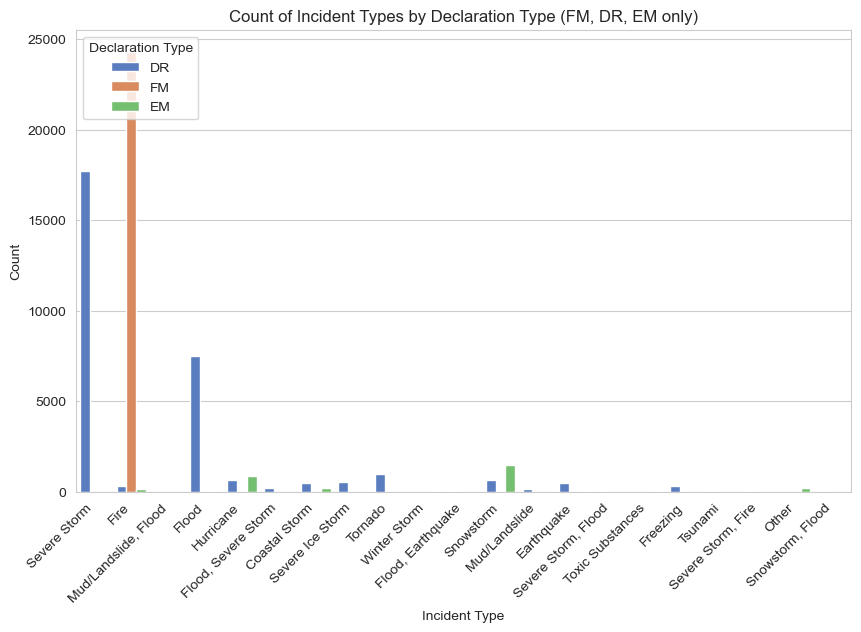

In [56]:
# Filter include only FM, DR, and EM incident types
filtered_border_disaster = border_disaster[border_disaster['declaration_type'].isin(['FM', 'DR', 'EM'])]

# Creating a count plot with the filtered data
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_border_disaster, x="incident_type", hue="declaration_type", palette="muted")

plt.xticks(rotation=45, ha="right")
plt.xlabel("Incident Type")
plt.ylabel("Count")
plt.title("Count of Incident Types by Declaration Type (FM, DR, EM only)")
plt.legend(title="Declaration Type")

plt.show()

#### Comparing Borders By Measure

In [57]:
# Filter data for US-Mexico Border
us_mexico_data = border_disaster[border_disaster["Border"] == "US-Mexico Border"]

# Filter data for US-Canada Border
us_canada_data = border_disaster[border_disaster["Border"] == "US-Canada Border"]

In [58]:
# Aggregate border activity by Measure for both borders
us_mexico_activity = us_mexico_data.groupby("Measure")["Value"].sum().reset_index()
us_canada_activity = us_canada_data.groupby("Measure")["Value"].sum().reset_index()
us_mexico_activity.rename(columns={"Value": "US-Mexico Value"}, inplace=True)
us_canada_activity.rename(columns={"Value": "US-Canada Value"}, inplace=True)

# Merge the two datasets for comparison
activity_comparison = pd.merge(
    us_mexico_activity,
    us_canada_activity,
    on="Measure",
    how="outer"
)

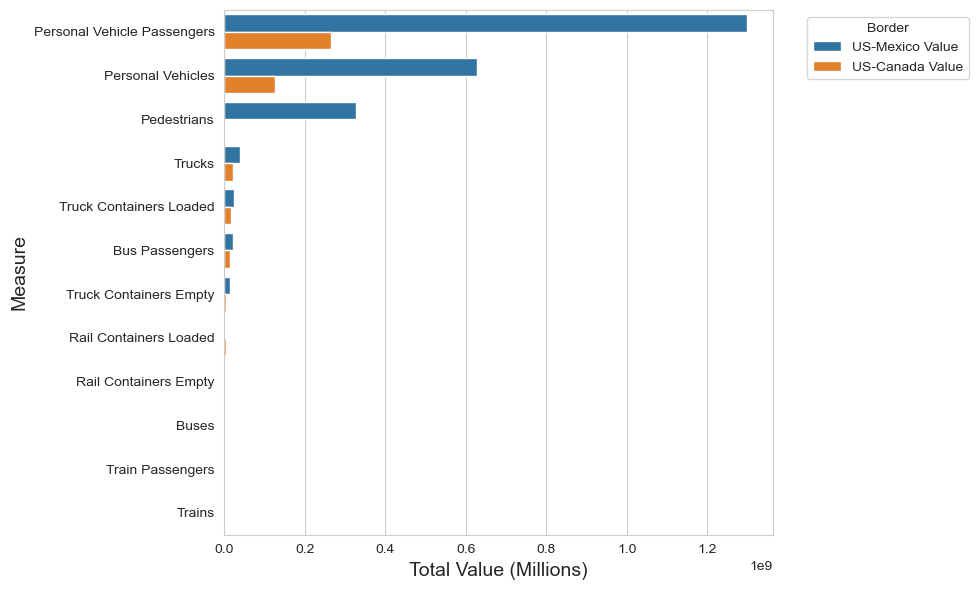

In [59]:
# Melt the activity_comparison for plotting
melted_data = activity_comparison.melt(id_vars="Measure", var_name="Border", value_name="Value")
melted_data = melted_data.sort_values("Value", ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6)) 
sns.barplot(data=melted_data, y="Measure", x="Value", hue="Border", orient="h")
#plt.title("Comparing Measures By Border", fontsize=16)
plt.xlabel("Total Value (Millions)", fontsize=14)
plt.ylabel("Measure", fontsize=14)
plt.legend(title="Border", bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout() 
plt.savefig("measure_compare.png", dpi=300, bbox_inches="tight")
plt.show()

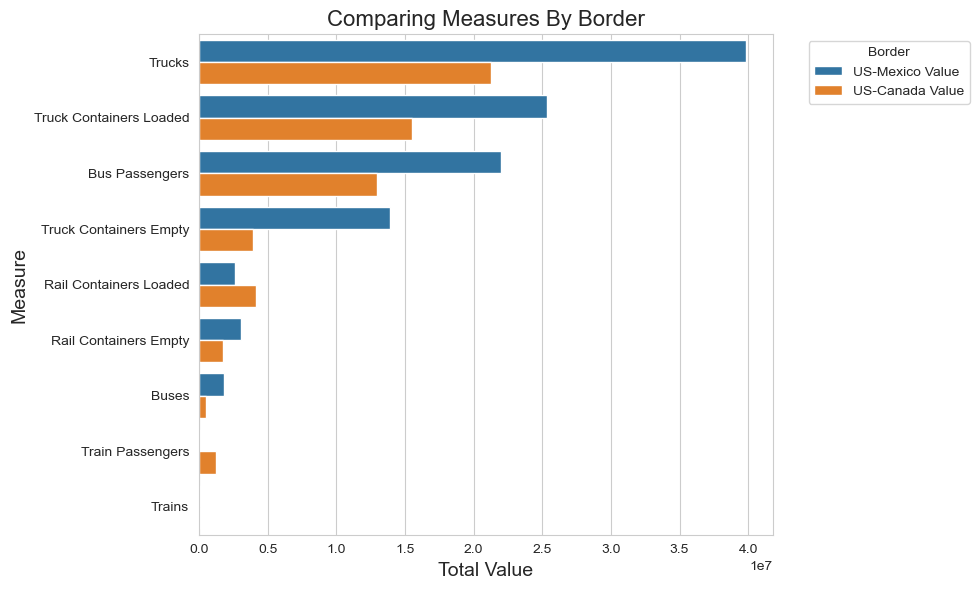

In [60]:
# Filter out rows that correspond to personal vehicle passengers and personal vehicles
activity_comparison_filtered = activity_comparison[~activity_comparison['Measure'].isin(['Personal Vehicle Passengers', 'Personal Vehicles', 'Pedestrians'])]

# Melt the filtered df for plotting
melted_data = activity_comparison_filtered.melt(id_vars="Measure", var_name="Border", value_name="Value")
melted_data = melted_data.sort_values("Value", ascending=False)

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=melted_data, y="Measure", x="Value", hue="Border", orient="h")

# Add labels and title
plt.title("Comparing Measures By Border", fontsize=16)
plt.xlabel("Total Value", fontsize=14)
plt.ylabel("Measure", fontsize=14)
plt.legend(title="Border", bbox_to_anchor=(1.05, 1), loc='upper left') 

# Display the plot
plt.tight_layout()
plt.show()


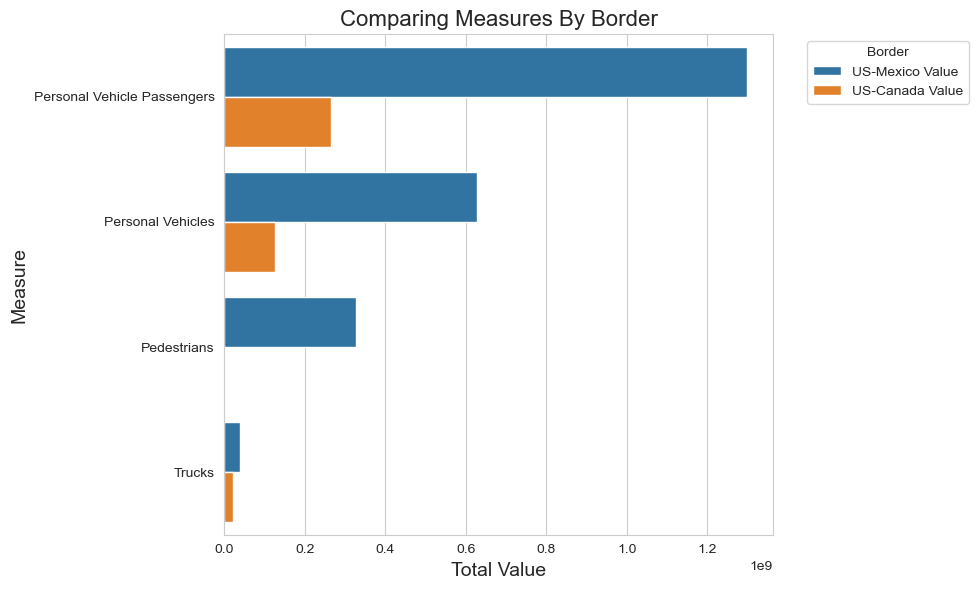

In [61]:
# Filter out rows that correspond to personal vehicle passengers and personal vehicles
activity_comparison_filtered = activity_comparison[activity_comparison['Measure'].isin(['Personal Vehicle Passengers', 'Personal Vehicles', 'Pedestrians', 'Trucks'])]

# Melt the filtered df for plotting
melted_data = activity_comparison_filtered.melt(id_vars="Measure", var_name="Border", value_name="Value")
melted_data = melted_data.sort_values("Value", ascending=False)

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
sns.barplot(data=melted_data, y="Measure", x="Value", hue="Border", orient="h")

# Add labels and title
plt.title("Comparing Measures By Border", fontsize=16)
plt.xlabel("Total Value", fontsize=14)
plt.ylabel("Measure", fontsize=14)
plt.legend(title="Border", bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot

# Display the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


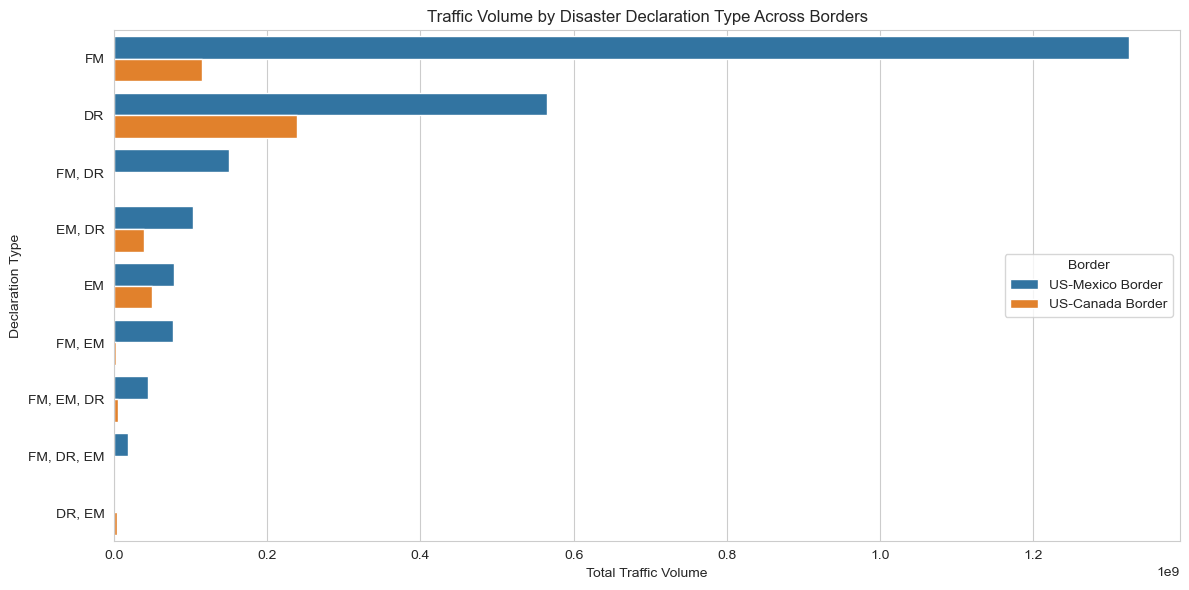

In [62]:
# Filter data by declaration_type and summarize traffic volume
grouped_data = border_disaster.groupby(['declaration_type', 'Border'])['Value'].sum().reset_index()

# Sort the data by 'Value' in descending order
grouped_data = grouped_data.sort_values(by="Value", ascending=False)

# Create a horizontal bar plot to compare traffic volumes by declaration type
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_data, x="Value", y="declaration_type", hue="Border", orient="h")
plt.title("Traffic Volume by Disaster Declaration Type Across Borders")
plt.xlabel("Total Traffic Volume")
plt.ylabel("Declaration Type")
plt.legend(title="Border")
plt.tight_layout()
plt.show()


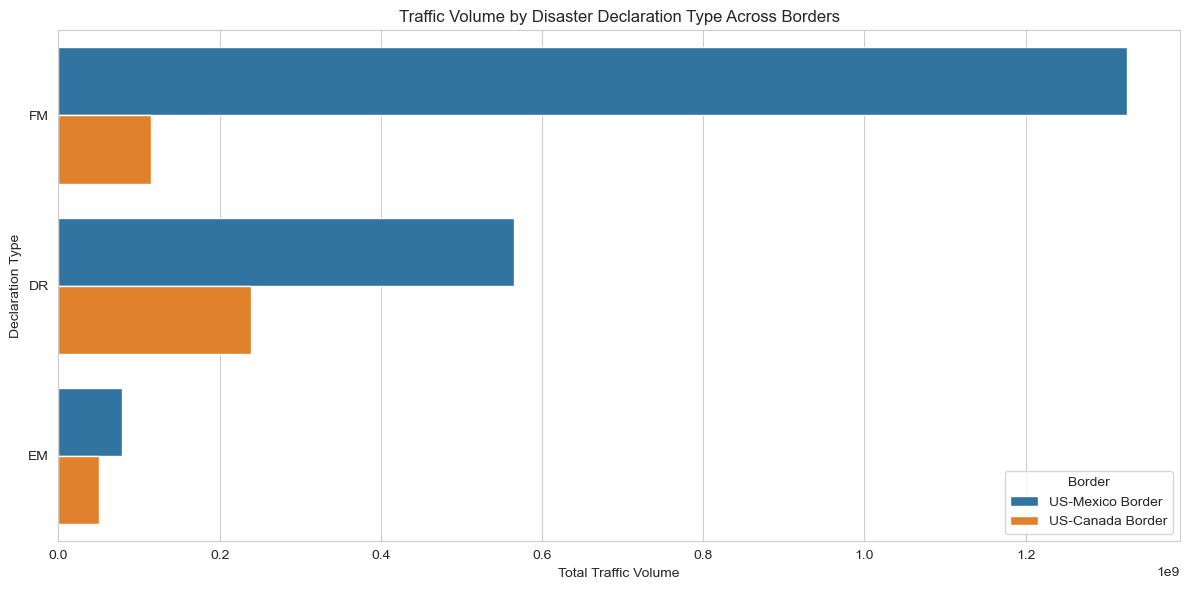

In [63]:
# Filter out rows where 'declaration_type' is 'DR', 'FM', or 'EM'
filtered_data = border_disaster[border_disaster['declaration_type'].isin(['DR', 'FM', 'EM'])]

# Filter data by declaration_type and summarize traffic volume
grouped_data = filtered_data.groupby(['declaration_type', 'Border'])['Value'].sum().reset_index()
grouped_data = grouped_data.sort_values(by="Value", ascending=False)

# horizontal bar plot to compare traffic volumes by declaration type
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_data, x="Value", y="declaration_type", hue="Border", orient="h")
plt.title("Traffic Volume by Disaster Declaration Type Across Borders")
plt.xlabel("Total Traffic Volume")
plt.ylabel("Declaration Type")
plt.legend(title="Border")
plt.tight_layout()
plt.show()



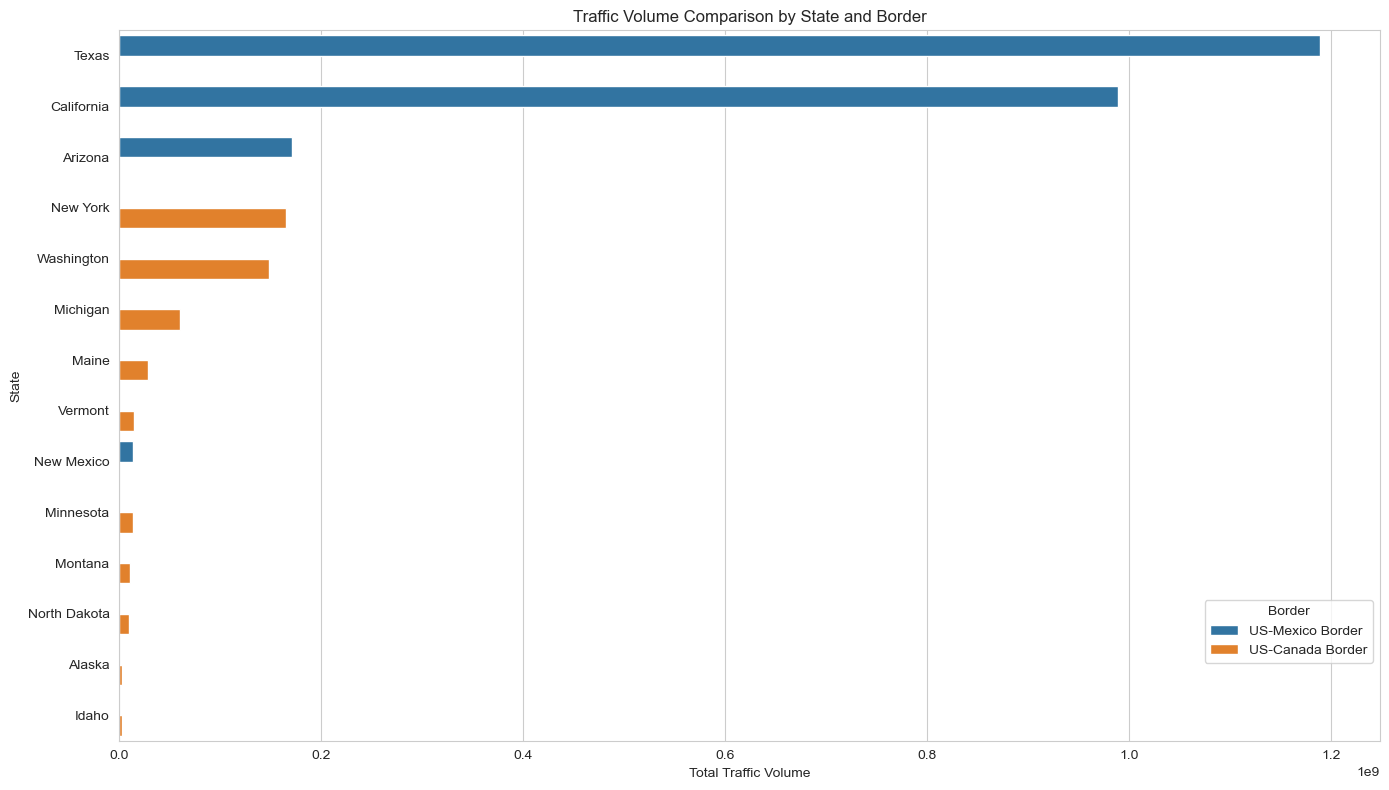

In [64]:
# Group by state and border, summarize traffic value
grouped_data = border_disaster.groupby(['state', 'Border'])['Value'].sum().reset_index()

# Sort the data by 'Value' in descending order
grouped_data = grouped_data.sort_values(by="Value", ascending=False)

# Create a horizontal bar plot comparing traffic across states
plt.figure(figsize=(14, 8))
sns.barplot(data=grouped_data, x="Value", y="state", hue="Border", orient="h")
plt.title("Traffic Volume Comparison by State and Border")
plt.xlabel("Total Traffic Volume")
plt.ylabel("State")
plt.legend(title="Border", bbox_to_anchor=(1.0, 0.1), loc='lower right')
plt.tight_layout()
plt.show()


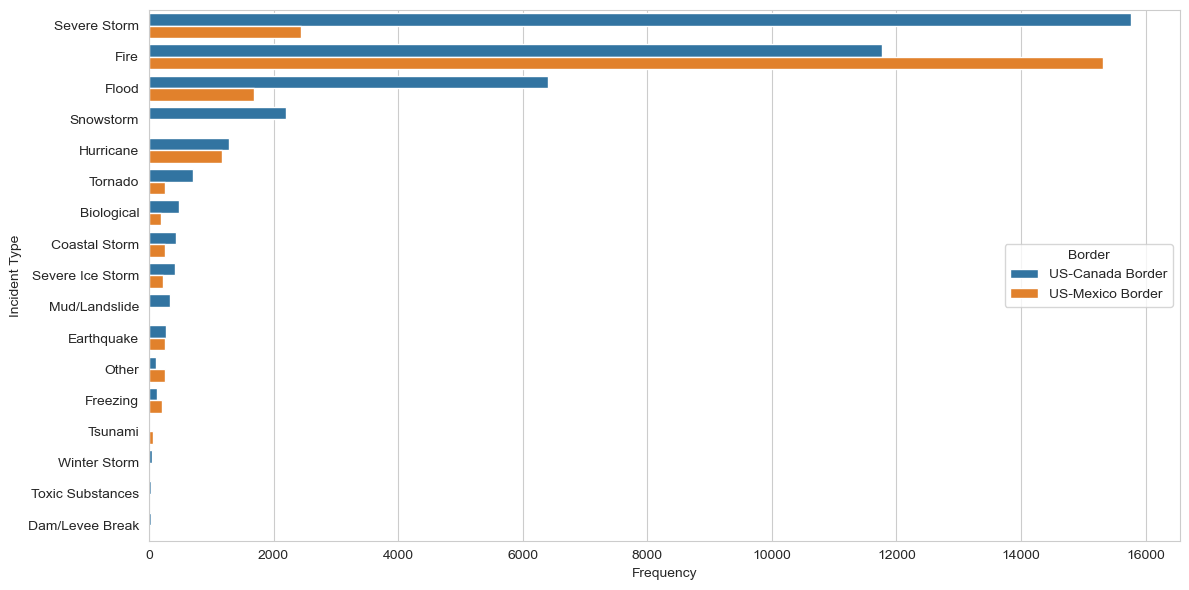

In [65]:
# Count the number of occurrences of each incident type by border
incident_counts = border_disaster.groupby(['incident_type', 'Border']).size().reset_index(name='count')

# Filter out aggregated incident types (those containing commas)
incident_counts_filtered = incident_counts[~incident_counts['incident_type'].str.contains(",", na=False)]

# Sort the data by 'count' in descending order
incident_counts_filtered = incident_counts_filtered.sort_values(by="count", ascending=False)

# Create a horizontal bar plot to show the frequency of individual incident types across borders
plt.figure(figsize=(12, 6))
sns.barplot(data=incident_counts_filtered, x="count", y="incident_type", hue="Border", orient="h")
#plt.title("Individual Incident Types Across Borders")
plt.xlabel("Frequency")
plt.ylabel("Incident Type")
plt.tight_layout()
plt.savefig("disaster_comparison_full.png", dpi=300, bbox_inches="tight")
plt.show()


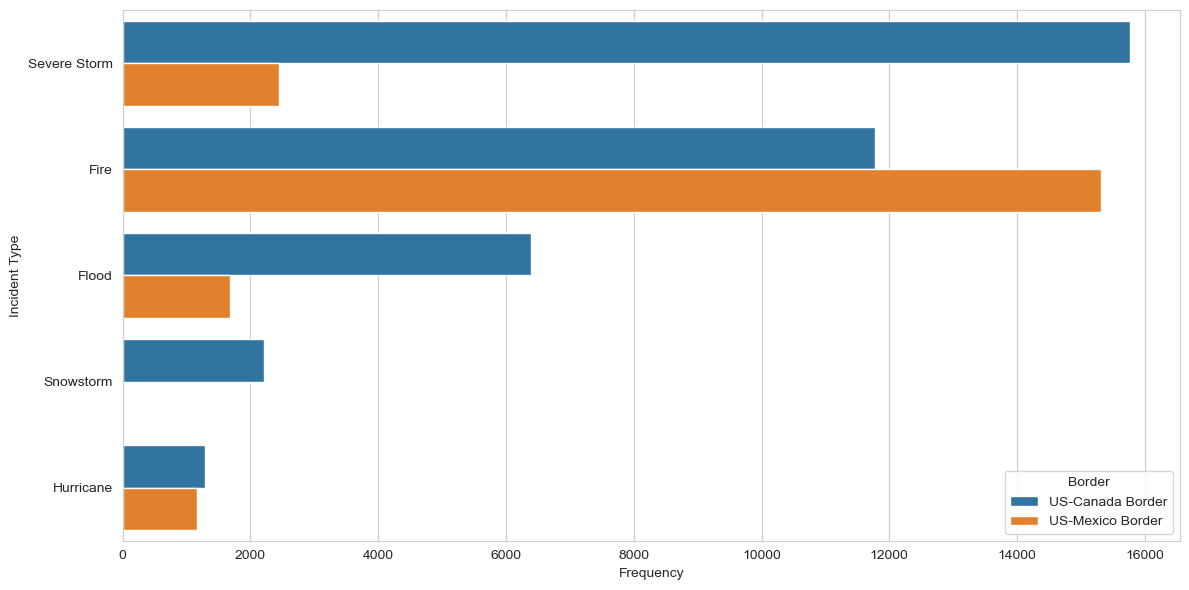

In [66]:
# Define the incident types you want to include
selected_incidents = ['Severe Storm', 'Fire', 'Flood', 'Snowstorm', 'Hurricane']

# Count the number of occurrences of each incident type by border
incident_counts = border_disaster.groupby(['incident_type', 'Border']).size().reset_index(name='count')

# Filter out aggregated incident types
incident_counts_filtered = incident_counts[~incident_counts['incident_type'].str.contains(",", na=False)]

incident_counts_selected = incident_counts_filtered[
    incident_counts_filtered['incident_type'].isin(selected_incidents)
]

# Sort the data by count in descending order
incident_counts_selected = incident_counts_selected.sort_values(by="count", ascending=False)
# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=incident_counts_selected, x="count", y="incident_type", hue="Border", orient="h")
#plt.title("Selected Incident Types Across Borders")
plt.xlabel("Frequency")
plt.ylabel("Incident Type")
plt.tight_layout()
plt.savefig("disaster_compare.png", dpi=300, bbox_inches="tight")
plt.show()


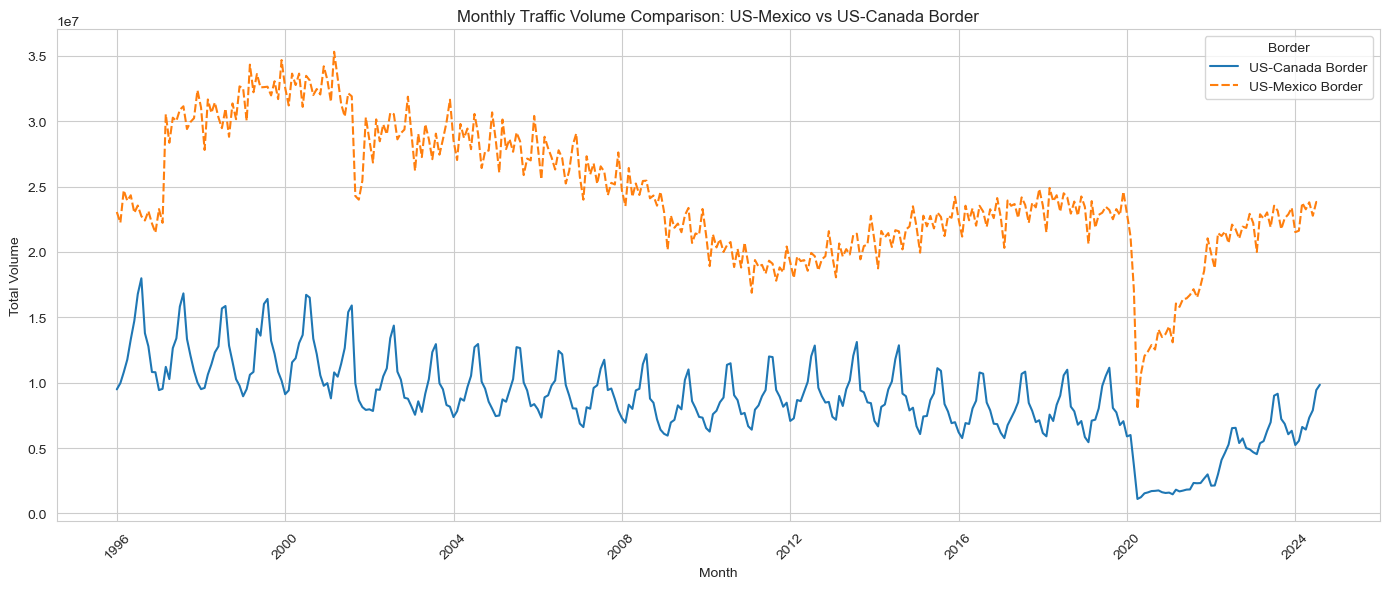

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = border_data.copy()
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Group by Date and Border, then sum the traffic Value
monthly_traffic = df.groupby(['Date', 'Border'])['Value'].sum().reset_index()

# Pivot for plotting
pivot_df = monthly_traffic.pivot(index='Date', columns='Border', values='Value')

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=pivot_df)
plt.title('Monthly Traffic Volume Comparison: US-Mexico vs US-Canada Border')
plt.ylabel('Total Volume')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(title='Border')
plt.show()


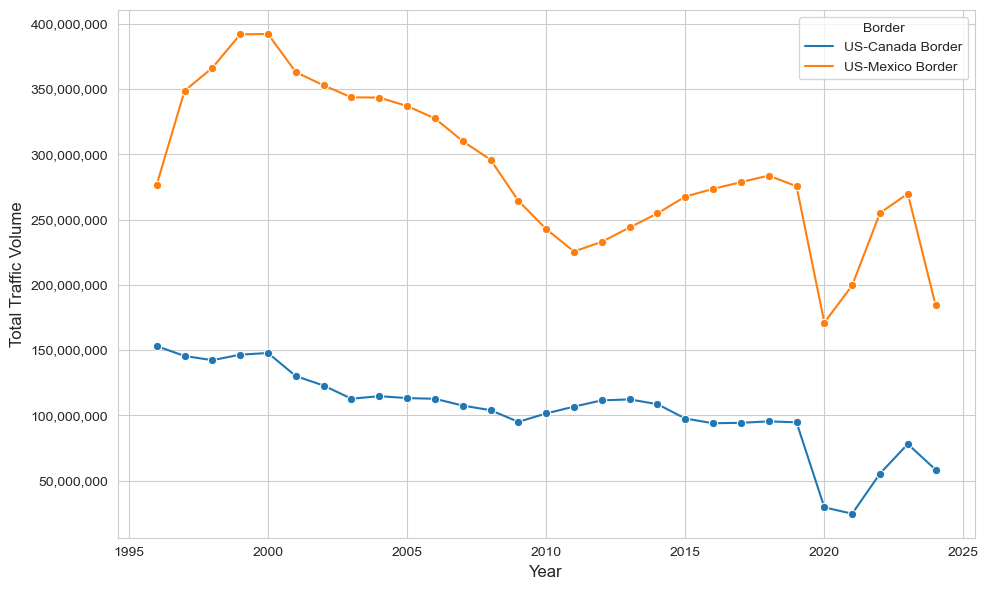

In [68]:
# Group by Year and Border, summing total traffic volume
yearly_traffic = df.groupby(['Year', 'Border'])['Value'].sum().reset_index()

# Plot line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_traffic, x='Year', y='Value', hue='Border', marker='o')

# Format y-axis with full numbers (no scientific notation)
formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
plt.gca().yaxis.set_major_formatter(formatter)

# Add labels and title
#plt.title("Yearly Border Traffic Volume: US-Mexico vs US-Canada", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Traffic Volume", fontsize=12)
plt.grid(True)
plt.legend(title="Border")
plt.tight_layout()
plt.savefig("line_comp.png", dpi=300, bbox_inches="tight")
plt.show()

In [69]:
# Make a copy of data set
df = border_data.copy()

# Select numerical features for clustering
features = df[["Value", "Latitude", "Longitude"]]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [70]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)


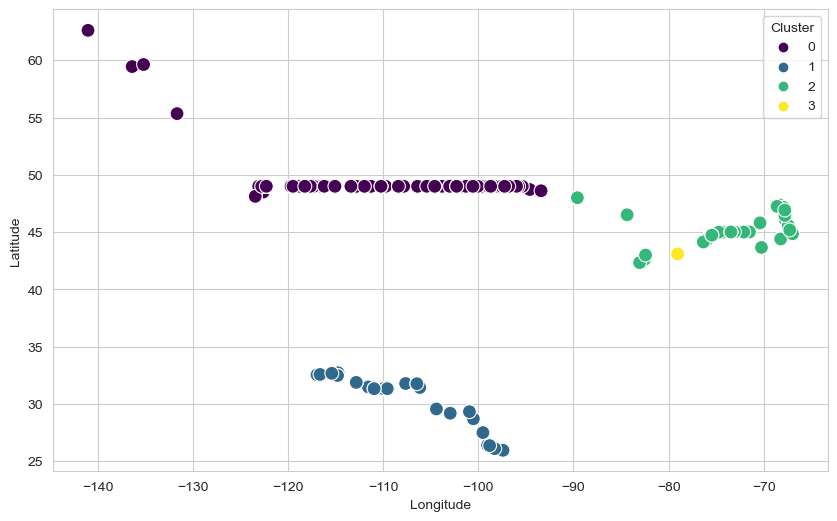

In [71]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="Longitude", y="Latitude",
    hue="Cluster", data=df,
    palette="viridis", s=100
)
#plt.title("Port Clusters Based on Traffic Volume and Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


In [72]:
# Drop rows with missing values
df = df.dropna(subset=['Measure', 'Value', 'Latitude', 'Longitude'])

# Features for clustering
X = df[['Value', 'Latitude', 'Longitude', 'Measure']]

# Column types
numeric_features = ['Value', 'Latitude', 'Longitude']
categorical_features = ['Measure']

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

#Create pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('cluster', KMeans(n_clusters=4, random_state=42))
])

# Fit pipeline and predict clusters
clusters = pipeline.fit_predict(X)

# Add clusters to data
df['Cluster'] = clusters
print(df[['Port Name', 'Value', 'Measure', 'Cluster']].head())


       Port Name  Value Measure  Cluster
0           Roma     46   Buses        0
1        Del Rio   6552  Trucks        0
2           Roma   3753  Trucks        0
3        Douglas     13   Buses        0
4  Beecher Falls    422  Trucks        1


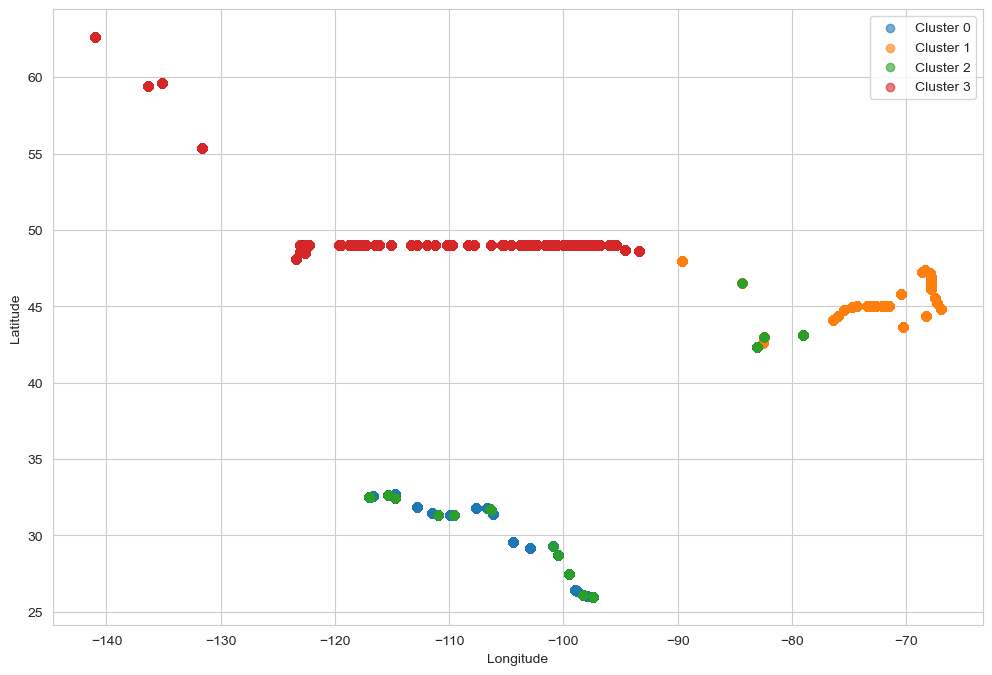

In [73]:
plt.figure(figsize=(12, 8))
# Scatterplot of clusters based on geolocation
for cluster_id in sorted(df['Cluster'].unique()):
    cluster_data = df[df['Cluster'] == cluster_id]
    plt.scatter(cluster_data['Longitude'], cluster_data['Latitude'], label=f'Cluster {cluster_id}', alpha=0.6)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
#plt.title('Border Crossing Clusters by Latitude/Longitude')
plt.legend()
plt.grid(True)
plt.show()


In [74]:
# Group by Cluster and Measure, then count how many times each Measure appears
cluster_measure_counts = df.groupby(['Cluster', 'Measure']).size().reset_index(name='Count')

# For each cluster, find the Measure with the highest count
dominant_measure_per_cluster = cluster_measure_counts.sort_values('Count', ascending=False).groupby('Cluster').first()

print(dominant_measure_per_cluster)


                             Measure  Count
Cluster                                    
0                             Trucks   8209
1                             Trucks   9247
2        Personal Vehicle Passengers   3830
3                  Personal Vehicles  19103


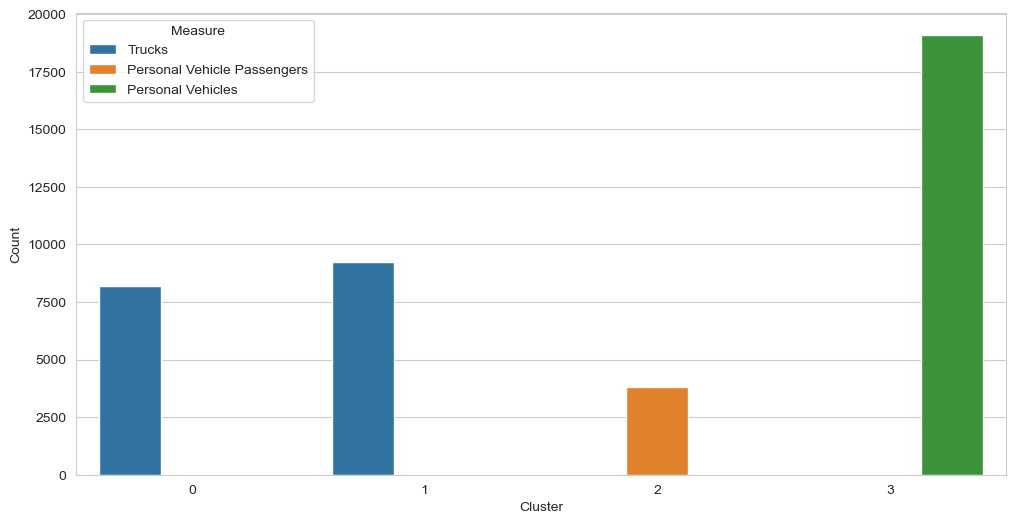

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=dominant_measure_per_cluster.reset_index(), x='Cluster', y='Count', hue='Measure')
#plt.title('Dominant Measure Type per Cluster')
plt.ylabel('Count')
plt.xlabel('Cluster')
plt.legend(title='Measure')
plt.show()


In [76]:
# Summary by cluster
cluster_summary = df.groupby('Cluster')[['Value']].agg(['mean', 'sum', 'count'])
print(cluster_summary)


                Value                    
                 mean         sum   count
Cluster                                  
0        3.774977e+04  3330813142   88234
1        1.416601e+04  1437580699  101481
2        1.022287e+06  5905751270    5777
3        3.556352e+03   709044050  199374


<AxesSubplot:xlabel='Year'>

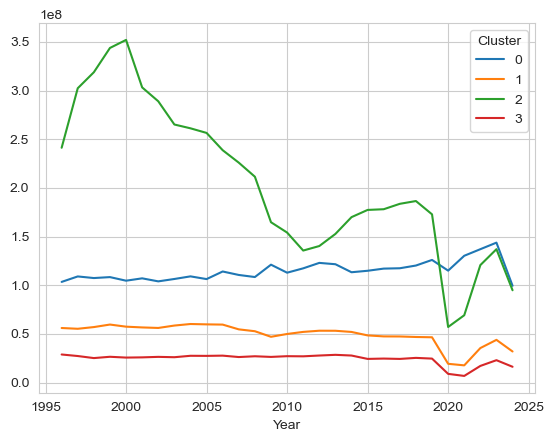

In [77]:
df.groupby(['Year', 'Cluster'])['Value'].sum().unstack().plot(kind='line')


In [78]:
df.groupby('Cluster')['Measure'].value_counts(normalize=True).unstack().fillna(0)

Measure,Bus Passengers,Buses,Pedestrians,Personal Vehicle Passengers,Personal Vehicles,Rail Containers Empty,Rail Containers Loaded,Train Passengers,Trains,Truck Containers Empty,Truck Containers Loaded,Trucks
Cluster,,,,,,,,,,,,
0,0.086747,0.086917,0.092651,0.063785,0.085035,0.077884,0.076875,0.073747,0.077884,0.092447,0.092991,0.093037
1,0.079276,0.079246,0.077946,0.086174,0.090746,0.078734,0.078734,0.077936,0.078645,0.091071,0.090372,0.091121
2,0.000000,0.000000,0.105764,0.662974,0.231262,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.078626,0.078646,0.078260,0.094907,0.095815,0.074097,0.074087,0.074092,0.074252,0.092981,0.090689,0.093548


Natural Disaster impact on crossings

In [79]:
# Sum crossing values by state, year, month
border_summary = (
    border_data
    .groupby(['state', 'Year', 'Month'])
    .agg({'Value': 'sum'})
    .reset_index()
    .rename(columns={'Value': 'total_crossings'})
)

# Only keep border states
border_states = ['Texas', 'Arizona', 'New Mexico', 'California', 'Maine', 'Michigan', 'Minnesota', 'Montana', 'New York', 'North Dakota', 'Vermont', 'Washington']
disaster = disaster[disaster['state'].isin(border_states)]

# Create a 'disaster_occurred' flag per state and month
disaster_flags = (
    disaster
    .groupby(['state', 'Year', 'Month'])
    .size()
    .reset_index(name='disaster_count')
)

# Set disaster_occurred to 1 if any disaster that month, else 0
disaster_flags['disaster_occurred'] = 1

# Merge Border Crossings and Disaster Flags
combined = pd.merge(
    border_summary,
    disaster_flags[['state', 'Year', 'Month', 'disaster_occurred']],
    on=['state', 'Year', 'Month'],
    how='left'
)

combined['disaster_occurred'] = combined['disaster_occurred'].fillna(0)
combined

,state,Year,Month,total_crossings,disaster_occurred
0,Alaska,1996,1,7705,0.0
1,Alaska,1996,2,7585,0.0
2,Alaska,1996,3,12710,0.0
3,Alaska,1996,4,19454,0.0
4,Alaska,1996,5,48239,0.0
...,...,...,...,...,...
4811,Washington,2024,4,1370617,0.0
4812,Washington,2024,5,1529290,0.0
4813,Washington,2024,6,1555651,0.0
4814,Washington,2024,7,1879757,0.0


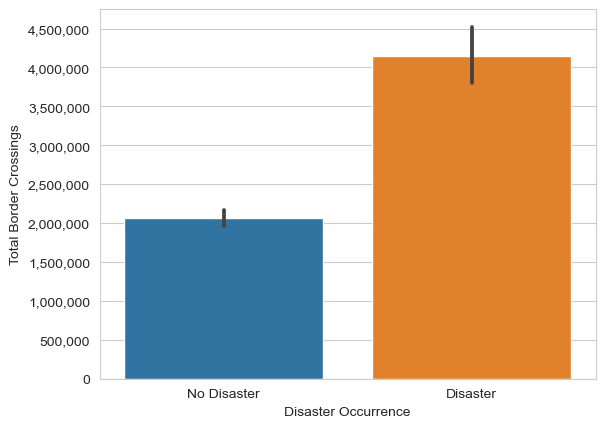

In [80]:
# Create the plot
sns.barplot(x='disaster_occurred', y='total_crossings', data=combined)
#plt.title('Border Crossings: Disaster vs No Disaster Months')
plt.xticks([0, 1], ['No Disaster', 'Disaster'])
plt.ylabel("Total Border Crossings")
plt.xlabel("Disaster Occurrence")
ax = plt.gca()
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.show()


In [81]:
def classify_severity(incident_type):
    minor_disasters = ['Flood', 'Tornado', 'Drought', 'Severe Storm', 'Fire', 'snowstorm']
    major_disasters = ['Hurricane', 'Earthquake', 'Tsunami']
    
    if incident_type in minor_disasters:
        return 'Minor'
    elif incident_type in major_disasters:
        return 'Major'
    else:
        return 'Unknown'

# Apply this classification to the disaster data
disaster['severity'] = disaster['incident_type'].apply(classify_severity)

# Merge the disaster data with the border data based on the state and date
combined = border_data.merge(disaster[['state', 'Year', 'Month', 'severity']], how='left', on=['state', 'Year', 'Month'])

# Mark whether a disaster occurred or not
combined['disaster_occurred'] = combined['severity'].apply(lambda x: 1 if x != 'Unknown' else 0)
combined = combined.dropna()
combined

,Port Name,state,Port Code,Border,Date,Measure,Value,Latitude,Longitude,Point,Year,Month,severity,disaster_occurred
18,Norton,Vermont,211,US-Canada Border,2022-12-01,Trucks,338,45.011,-71.793,POINT (-71.793219 45.010771),2022,12,Minor,1
19,Norton,Vermont,211,US-Canada Border,2022-12-01,Trucks,338,45.011,-71.793,POINT (-71.793219 45.010771),2022,12,Minor,1
20,Norton,Vermont,211,US-Canada Border,2022-12-01,Trucks,338,45.011,-71.793,POINT (-71.793219 45.010771),2022,12,Minor,1
21,Norton,Vermont,211,US-Canada Border,2022-12-01,Trucks,338,45.011,-71.793,POINT (-71.793219 45.010771),2022,12,Minor,1
22,Norton,Vermont,211,US-Canada Border,2022-12-01,Trucks,338,45.011,-71.793,POINT (-71.793219 45.010771),2022,12,Minor,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1590478,Westhope,North Dakota,3419,US-Canada Border,1996-03-01,Trains,0,49.000,-101.017,POINT (-101.017277 48.999611),1996,3,Minor,1
1590479,Westhope,North Dakota,3419,US-Canada Border,1996-03-01,Trains,0,49.000,-101.017,POINT (-101.017277 48.999611),1996,3,Minor,1
1590480,Westhope,North Dakota,3419,US-Canada Border,1996-03-01,Trains,0,49.000,-101.017,POINT (-101.017277 48.999611),1996,3,Minor,1
1590481,Westhope,North Dakota,3419,US-Canada Border,1996-03-01,Trains,0,49.000,-101.017,POINT (-101.017277 48.999611),1996,3,Minor,1


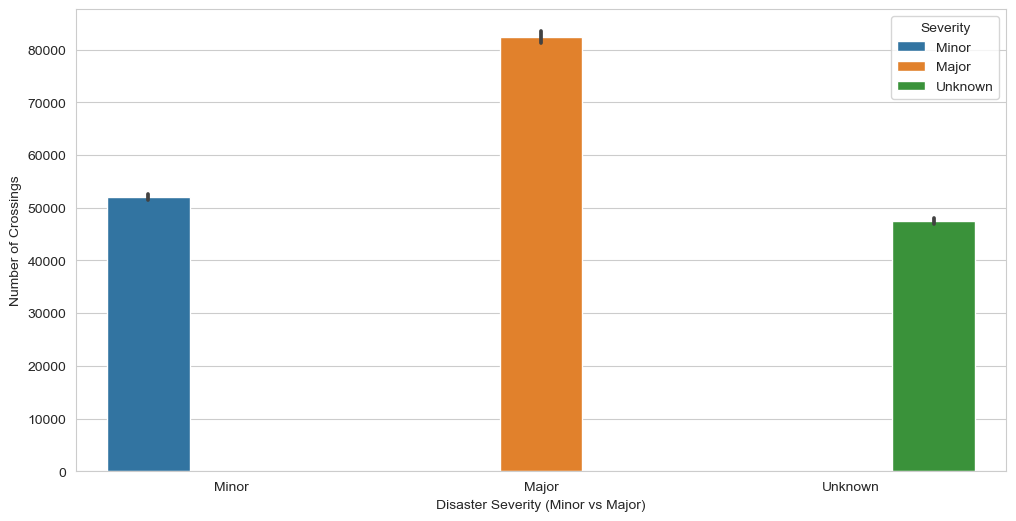

In [82]:
# Create a boxplot for border crossings based on disaster severity
plt.figure(figsize=(12, 6))
sns.barplot(data=combined, x='severity', y='Value', hue='severity')
plt.xlabel('Disaster Severity (Minor vs Major)')
plt.ylabel('Number of Crossings')
#plt.title('Impact of Disaster Severity on Border Crossings')
plt.legend(title='Severity')
plt.show()


In [83]:
from scipy import stats

# Filter the data for only those rows with a disaster
disaster_data_filtered = combined[combined['disaster_occurred'] == 1]

# Perform ANOVA to check if there are significant differences between Minor and Major disasters
minor_crossings = disaster_data_filtered[disaster_data_filtered['severity'] == 'Minor']['Value']
major_crossings = disaster_data_filtered[disaster_data_filtered['severity'] == 'Major']['Value']
f_statistic, p_value = stats.f_oneway(minor_crossings, major_crossings)
print(f"F-statistic: {f_statistic}, p-value: {p_value}")


F-statistic: 2661.797133101586, p-value: 0.0


In [84]:
# Average crossings per severity
avg_minor = minor_crossings.mean()
avg_major = major_crossings.mean()

print(f"Average crossings during Minor disasters: {avg_minor}")
print(f"Average crossings during Major disasters: {avg_major}")


Average crossings during Minor disasters: 52023.75418475888
Average crossings during Major disasters: 82303.09516117738


In [85]:
# Convert categorical variables to category type
#df['state'] = df['state'].astype('category')
df['Border'] = df['Border'].astype('category')
df['Measure'] = df['Measure'].astype('category')
df['Month'] = df['Month'].astype('category')  # optional, for seasonality

# Poisson regression
model = smf.glm(
    formula='Value ~ Border + Measure + Month',
    data=df,
    family=sm.families.Poisson()
).fit()

print(model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Value   No. Observations:               394866
Model:                            GLM   Df Residuals:                   394842
Model Family:                 Poisson   Df Model:                           23
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.0716e+10
Date:                Sun, 11 May 2025   Deviance:                   2.1430e+10
Time:                        17:00:26   Pearson chi2:                 4.78e+10
No. Iterations:                    18   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [86]:
# Fit Poisson model
formula = 'Value ~ state + Border + Measure + Month'
poisson_model = smf.glm(formula=formula, data=df, family=sm.families.Poisson()).fit()
print(poisson_model.summary())

# Check for Overdispersion
pearson_chi2 = sum(poisson_model.resid_pearson**2)
df_resid = poisson_model.df_resid
dispersion_stat = pearson_chi2 / df_resid

print("\nOverdispersion Test:")
print(f"Pearson Chi-square: {pearson_chi2:.2e}")
print(f"Residual degrees of freedom: {df_resid}")
print(f"Dispersion Statistic: {dispersion_stat:.2f}")

if dispersion_stat > 1.5:
    print(" Overdispersion detected! Consider using Negative Binomial regression.")
else:
    print("No significant overdispersion detected.")

# Fit Negative Binomial model
nb_model = smf.glm(formula=formula, data=df, family=sm.families.NegativeBinomial()).fit()
print("\nNegative Binomial Model Summary:")
print(nb_model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Value   No. Observations:               394866
Model:                            GLM   Df Residuals:                   394830
Model Family:                 Poisson   Df Model:                           35
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -7.3788e+09
Date:                Sun, 11 May 2025   Deviance:                   1.4755e+10
Time:                        17:02:45   Pearson chi2:                 2.67e+10
No. Iterations:                   100   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [87]:
formula = 'Value ~ state + Border + Measure + Month'
y, X = dmatrices(formula, data=df, return_type='dataframe')

# VIF values
vif_df = pd.DataFrame()
vif_df["Variable"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_df.sort_values(by="VIF", ascending=False))


C:\Users\saiha\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                  Variable        VIF
2                      state[T.California]        inf
1                         state[T.Arizona]        inf
14              Border[T.US-Mexico Border]        inf
8                      state[T.New Mexico]        inf
11                          state[T.Texas]        inf
0                                Intercept  53.423336
10                   state[T.North Dakota]   5.027290
13                     state[T.Washington]   4.325361
4                           state[T.Maine]   3.918370
7                         state[T.Montana]   3.857277
6                       state[T.Minnesota]   2.849281
9                        state[T.New York]   2.716911
12                        state[T.Vermont]   2.362234
18            Measure[T.Personal Vehicles]   1.978848
17  Measure[T.Personal Vehicle Passengers]   1.978252
25                       Measure[T.Trucks]   1.954476
23       Measure[T.Truck Containers Empty]   1.950483
24      Measure[T.Truck Cont

In [88]:
# Without state
formula = 'Value ~ Border + Measure + Month'
y, X = dmatrices(formula, data=df, return_type='dataframe')

# VIF values
vif_df = pd.DataFrame()
vif_df["Variable"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_df.sort_values(by="VIF", ascending=False))


                                  Variable        VIF
0                                Intercept  23.801234
5             Measure[T.Personal Vehicles]   1.978660
4   Measure[T.Personal Vehicle Passengers]   1.978052
12                       Measure[T.Trucks]   1.954279
10       Measure[T.Truck Containers Empty]   1.950287
11      Measure[T.Truck Containers Loaded]   1.938908
3                   Measure[T.Pedestrians]   1.863779
2                         Measure[T.Buses]   1.841474
17                              Month[T.6]   1.835706
18                              Month[T.7]   1.834808
16                              Month[T.5]   1.834380
13                              Month[T.2]   1.833169
14                              Month[T.3]   1.831483
15                              Month[T.4]   1.830832
19                              Month[T.8]   1.825610
20                              Month[T.9]   1.808088
21                             Month[T.10]   1.807635
22                          

In [89]:
formula = 'Value ~ Border + Measure + Month'
y, X = patsy.dmatrices(formula, data=df, return_type='dataframe')
import numpy as np

# Fit the model using Negative Binomial (since overdispersion was detected)
model = sm.GLM(y, X, family=sm.families.NegativeBinomial(link=sm.families.links.log()))
results = model.fit()
print(results.params)

def predict_expected_value(input_dict):
    """
    input_dict: A dictionary like {'Border[T.US-Mexico Border]': 1, 'Measure[T.Trucks]': 1, 'Month[T.8]': 1}
    Assumes all unspecified dummies are zero.
    """
    intercept = results.params['Intercept']
    linear_sum = intercept
    for feature, value in input_dict.items():
        if feature in results.params:
            linear_sum += results.params[feature] * value
    return np.exp(linear_sum)  # Because of log link

input_example = {
    'Border[T.US-Mexico Border]': 1,
    'Measure[T.Trucks]': 1,
    'Month[T.8]': 1
}

expected_value = predict_expected_value(input_example)
print(f"Expected Value: {expected_value}")


Intercept                                 7.851208
Border[T.US-Mexico Border]                1.686008
Measure[T.Buses]                         -3.042198
Measure[T.Pedestrians]                    0.949084
Measure[T.Personal Vehicle Passengers]    3.152844
Measure[T.Personal Vehicles]              2.424947
Measure[T.Rail Containers Empty]         -1.515052
Measure[T.Rail Containers Loaded]        -0.715611
Measure[T.Train Passengers]              -2.555228
Measure[T.Trains]                        -4.604066
Measure[T.Truck Containers Empty]        -0.919615
Measure[T.Truck Containers Loaded]        0.396850
Measure[T.Trucks]                         0.650135
Month[T.2]                               -0.044391
Month[T.3]                                0.084089
Month[T.4]                                0.074721
Month[T.5]                                0.177581
Month[T.6]                                0.201870
Month[T.7]                                0.262643
Month[T.8]                     

In [90]:
# Convert to categorical as needed
df['Border'] = df['Border'].astype('category')
df['Measure'] = df['Measure'].astype('category')
df['Month'] = df['Month'].astype(int)  # Assuming month is numeric

# reference categories, goes alphabetically if not defined
df['Border'] = df['Border'].cat.reorder_categories(['US-Canada Border', 'US-Mexico Border'], ordered=True)

In [91]:
# Fit the model using a formula
formula = "Value ~ C(Border) + C(Measure) + C(Month)"
model = smf.glm(formula=formula, data=df, family=sm.families.NegativeBinomial()).fit()
print(model.summary())

coefficients = model.params
rate_ratios = np.exp(coefficients)

# Display rate ratios
print(rate_ratios)


                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Value   No. Observations:               394866
Model:                            GLM   Df Residuals:                   394842
Model Family:        NegativeBinomial   Df Model:                           23
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -3.5695e+06
Date:                Sun, 11 May 2025   Deviance:                   2.8086e+06
Time:                        17:07:29   Pearson chi2:                 4.15e+06
No. Iterations:                    27   Pseudo R-squ. (CS):             0.9884
Covariance Type:            nonrobust                                         
                                                coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [92]:
sorted(df['Measure'].unique())

['Bus Passengers',
 'Buses',
 'Pedestrians',
 'Personal Vehicle Passengers',
 'Personal Vehicles',
 'Rail Containers Empty',
 'Rail Containers Loaded',
 'Train Passengers',
 'Trains',
 'Truck Containers Empty',
 'Truck Containers Loaded',
 'Trucks']

In [93]:
# Predict on new data 
new_data = pd.DataFrame({
    'Border': ['US-Mexico Border'],
    'Measure': ['Pedestrians'],
    'Month': [7]
})

# Ensure categorical types match
new_data['Border'] = pd.Categorical(new_data['Border'], categories=df['Border'].cat.categories)
new_data['Measure'] = pd.Categorical(new_data['Measure'], categories=df['Measure'].cat.categories)

# Predict
predicted_counts = model.predict(new_data)
print(predicted_counts)


0    46580.808348
dtype: float64


# Natural disasters added to negative binomial model

In [94]:
disaster['Year'] = disaster['declaration_date'].dt.year
disaster['Month'] = disaster['declaration_date'].dt.month

# Aggregate count of disasters by year-month and state
disaster_counts = (
    disaster.groupby(['state', 'Year', 'Month'])
    .size()
    .reset_index(name='disaster_count')
)


In [95]:
# Merge disaster counts
df_merged = df.merge(disaster_counts, how='left', left_on=['state', 'Year', 'Month'], right_on=['state', 'Year', 'Month'])

# Fill NaNs with 0 (no disasters reported that month in that state)
df_merged['disaster_count'] = df_merged['disaster_count'].fillna(0)


In [96]:
# Fit model with disaster count included
formula = "Value ~ C(Border) + C(Measure) + C(Month) + disaster_count"
poisson_model = smf.glm(formula=formula, data=df_merged, family=sm.families.Poisson()).fit()
print(poisson_model.summary())
#print(model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Value   No. Observations:               394866
Model:                            GLM   Df Residuals:                   394841
Model Family:                 Poisson   Df Model:                           24
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.0715e+10
Date:                Sun, 11 May 2025   Deviance:                   2.1428e+10
Time:                        17:07:48   Pearson chi2:                 4.78e+10
No. Iterations:                    20   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                                coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [97]:
# Fit the model using a formula
formula = "Value ~ C(Border) + C(Measure) + C(Month) + disaster_count"
model = smf.glm(formula=formula, data=df_merged, family=sm.families.NegativeBinomial()).fit()

print(model.summary())
import numpy as np

# If `model` is your fitted negative binomial model
coefficients = model.params
rate_ratios = np.exp(coefficients)

# Display rate ratios
print(rate_ratios)


                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Value   No. Observations:               394866
Model:                            GLM   Df Residuals:                   394841
Model Family:        NegativeBinomial   Df Model:                           24
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -3.5695e+06
Date:                Sun, 11 May 2025   Deviance:                   2.8085e+06
Time:                        17:08:16   Pearson chi2:                 4.15e+06
No. Iterations:                    33   Pseudo R-squ. (CS):             0.9884
Covariance Type:            nonrobust                                         
                                                coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [98]:
df_merged['disaster_count'].unique()

array([  0.,  42.,   5.,  32.,  15.,  14., 129., 515., 180.,   7.,   1.,
        53.,   2.,  51.,   4., 113.,  10.,  40.,  16.,  17.,   6.,  18.,
        55.,  57.,   3.,  21.,  28.,   9.,  19.,  12., 266., 763.,  13.,
        11.,  20.,  24., 508.,  62.,  85.,  36.,  23.,  26.,  44.,   8.,
        58.,  31.,  59., 107., 443.,  29., 130., 116., 188.,  82.,  69.,
        27.,  38.,  46.,  22.,  78., 123.,  49.,  76.,  30.,  33.,  25.,
        43.,  34., 239.,  52., 139.,  39.,  61.,  56.,  87.,  83.,  54.,
        41.,  70.,  48.,  72., 263., 229.,  67.,  60.])

# Random Forest and Gradient Boosting

In [99]:
df = df_merged.copy()

# Create binary target variable
df['disaster_occurred'] = (df['disaster_count'] > 0).astype(int)

# Convert month to sine and cosine
df['month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)

# Label encode state
le = LabelEncoder()
df['state_encoded'] = le.fit_transform(df['state'])

# Aggregate total crossings per group
df_grouped = df.groupby(['state', 'Year', 'Month'])['Value'].sum().reset_index()
df_grouped.rename(columns={'Value': 'total_crossings'}, inplace=True)

# Merge back to original
df = pd.merge(df, df_grouped, on=['state', 'Year', 'Month'])



In [100]:
# Feature selection
features = ['state_encoded', 'Year', 'month_sin', 'month_cos', 'total_crossings']
X = df[features]
y = df['disaster_occurred']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [101]:
df_merged.groupby(['state', 'Year', 'Month'])['disaster_count'].max()


state       Year  Month
Alaska      1996  1        0.0
                  2        0.0
                  3        0.0
                  4        0.0
                  5        0.0
                          ... 
Washington  2024  4        0.0
                  5        0.0
                  6        0.0
                  7        0.0
                  8        0.0
Name: disaster_count, Length: 4816, dtype: float64

In [102]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Fit Random Forest
clf = RandomForestClassifier(n_estimators=100, max_depth=10, class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)

# Prediction and evaluation
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, clf.predict_proba(X_test)[:,1]))


              precision    recall  f1-score   support

           0       1.00      0.85      0.92     98924
           1       0.57      0.98      0.72     19536

    accuracy                           0.87    118460
   macro avg       0.78      0.92      0.82    118460
weighted avg       0.92      0.87      0.89    118460

ROC-AUC Score: 0.9712838469118543


In [103]:
# Fit a Gradient Boosting model
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = gb_clf.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, gb_clf.predict_proba(X_test)[:, 1]))


              precision    recall  f1-score   support

           0       0.85      1.00      0.92     98924
           1       0.90      0.13      0.23     19536

    accuracy                           0.85    118460
   macro avg       0.88      0.56      0.58    118460
weighted avg       0.86      0.85      0.81    118460

ROC-AUC Score: 0.8206128478360823


In [104]:
border_data

,Port Name,state,Port Code,Border,Date,Measure,Value,Latitude,Longitude,Point,Year,Month
0,Roma,Texas,2310,US-Mexico Border,2023-12-01,Buses,46,26.404,-99.019,POINT (-99.018981 26.403928),2023,12
1,Del Rio,Texas,2302,US-Mexico Border,2023-12-01,Trucks,6552,29.327,-100.928,POINT (-100.927612 29.326784),2023,12
2,Roma,Texas,2310,US-Mexico Border,2023-11-01,Trucks,3753,26.404,-99.019,POINT (-99.018981 26.403928),2023,11
3,Douglas,Arizona,2601,US-Mexico Border,2023-10-01,Buses,13,31.334,-109.560,POINT (-109.560344 31.334043),2023,10
4,Beecher Falls,Vermont,206,US-Canada Border,2023-08-01,Trucks,422,45.013,-71.505,POINT (-71.505309 45.013411),2023,8
...,...,...,...,...,...,...,...,...,...,...,...,...
394861,Ogdensburg,New York,701,US-Canada Border,2024-08-01,Buses,9,44.733,-75.458,POINT (-75.4577501759 44.7330898624),2024,8
394862,Limestone,Maine,118,US-Canada Border,2024-08-01,Personal Vehicles,1237,46.925,-67.790,POINT (-67.789597 46.924555),2024,8
394863,Turner,Montana,3306,US-Canada Border,2024-08-01,Pedestrians,8,49.000,-108.388,POINT (-108.387916 48.999527),2024,8
394864,El Paso,Texas,2402,US-Mexico Border,2024-08-01,Bus Passengers,21933,31.764,-106.451,POINT (-106.451188 31.764363),2024,8


# Poisson Distribution

In [126]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Convert categorical variables if not already
df['Border'] = df['Border'].astype('category')
df['Measure'] = df['Measure'].astype('category')
df['Month'] = df['Month'].astype('category')
df['Year'] = df['Year'].astype('category')
df['state'] = df['state'].astype('category')
df['Port Name'] = df['Port Name'].astype('category')
# Subset for U.S.-Mexico
df_mexico = df_merged[df_merged['Border'] == 'US-Mexico Border']

model_mexico = smf.glm(
    formula='Value ~ Measure + Month + Year + disaster_count',
    data=df_mexico,
    family=sm.families.Poisson()
).fit()

print("=== Poisson GLM for U.S.-Mexico Border ===")
print(model_mexico.summary())



=== Poisson GLM for U.S.-Mexico Border ===
                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Value   No. Observations:                93065
Model:                            GLM   Df Residuals:                    93050
Model Family:                 Poisson   Df Model:                           14
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -5.3209e+09
Date:                Sun, 11 May 2025   Deviance:                   1.0641e+10
Time:                        18:42:11   Pearson chi2:                 1.38e+10
No. Iterations:                    15   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------

In [127]:
# Subset for U.S.-Canada
df_canada = df_merged[df_merged['Border'] == 'US-Canada Border']

model_canada = smf.glm(
    formula='Value ~ Measure + Month + Year + disaster_count',
    data=df_canada,
    family=sm.families.Poisson()
).fit()

print("\n=== Poisson GLM for U.S.-Canada Border ===")
print(model_canada.summary())



=== Poisson GLM for U.S.-Canada Border ===
                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Value   No. Observations:               301801
Model:                            GLM   Df Residuals:                   301786
Model Family:                 Poisson   Df Model:                           14
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -4.8021e+09
Date:                Sun, 11 May 2025   Deviance:                   9.6026e+09
Time:                        18:43:40   Pearson chi2:                 2.65e+10
No. Iterations:                    10   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------

Feature	Mexico Border	Canada Border
Baseline Traffic (Intercept)	Higher (9.23)	Lower (7.87)
Pedestrian Impact	Very High Positive (2.62)	Strong Negative (-1.70)
Truck & Vehicle Impact	Positive and significant	Also positive and significant
Train-Related Impact	More Negative (e.g., -5.23)	Less Negative (e.g., -2.40)
Seasonality	Subtle, minor changes	Strong, summer peaks (Jul-Aug)


In [128]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.genmod.families import NegativeBinomial
# Replace 'df_mexico' with your actual DataFrame name for Mexico
nb_model_mexico = smf.glm(
    formula='Value ~ Measure + Month + Year + disaster_count',
    data=df_mexico,
    family=NegativeBinomial()
).fit()

print(nb_model_mexico.summary())
# Replace 'df_canada' with your actual DataFrame name for Canada
nb_model_canada = smf.glm(
    formula='Value ~ Measure + Month + Year + disaster_count',
    data=df_canada,
    family=NegativeBinomial()
).fit()

print(nb_model_canada.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Value   No. Observations:                93065
Model:                            GLM   Df Residuals:                    93050
Model Family:        NegativeBinomial   Df Model:                           14
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -9.2107e+05
Date:                Sun, 11 May 2025   Deviance:                   5.0546e+05
Time:                        18:44:11   Pearson chi2:                 5.07e+05
No. Iterations:                    20   Pseudo R-squ. (CS):             0.9934
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

1. Southern Border Model (likely first output):
Intercept: 9.25 → Indicates high baseline traffic (in log scale).

Most impactful positive predictors:

Measure[T.Personal Vehicle Passengers] (coef ≈ 3.95)

Measure[T.Personal Vehicles] (coef ≈ 3.21)

Measure[T.Pedestrians] (coef ≈ 2.62)

Strongest negative predictors:

Measure[T.Trains] (≈ -5.59)

Measure[T.Train Passengers] (≈ -5.23)

Measure[T.Buses] (≈ -2.55)

Monthly trends: Traffic slightly dips in months 2, 4, 9, 11, and 12.

2. Northern Border Model (likely second output):
Intercept: 7.87 → Lower baseline traffic than Southern.

Most impactful positive predictors:

Measure[T.Personal Vehicle Passengers] (coef ≈ 2.91)

Measure[T.Personal Vehicles] (coef ≈ 2.18)

Measure[T.Trucks] (coef ≈ 0.67)

Strongest negative predictors:

Measure[T.Trains] (≈ -4.48)

Measure[T.Buses] (≈ -3.17)

Measure[T.Pedestrians] (≈ -1.75)

Monthly trends: Positive seasonal increase from March to September, peaking in August.

Key Insights:
Feature	Southern Border	Northern Border
Volume (Intercept)	High	Lower
Pedestrian Traffic	Strong positive	Strong negative
Trains	Very negative	Very negative
Truck-related traffic	Modest positive	Strong positive
Seasonality	Slight decreases mid-to-end of year	Strong increases in warmer months

In Model 1, most monthly effects are insignificant or negative.

In Model 2, monthly coefficients are generally positive and significant, suggesting higher traffic counts in later months (especially June–September).

In [108]:
border_counts = border_data.groupby('Border')['Value'].sum()

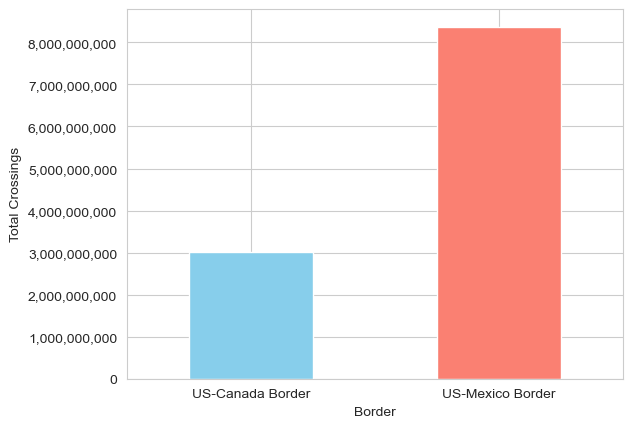

In [109]:
# Create bar plot with custom colors
colors = ['skyblue', 'salmon']  # Customize as needed

ax = border_counts.plot(kind='bar', color=colors)

# Format y-axis to show full numbers
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Labels and title
plt.ylabel('Total Crossings')
#plt.title('Total Border Crossings by Border')
plt.xticks(rotation=0)

# Show the plot
plt.show()

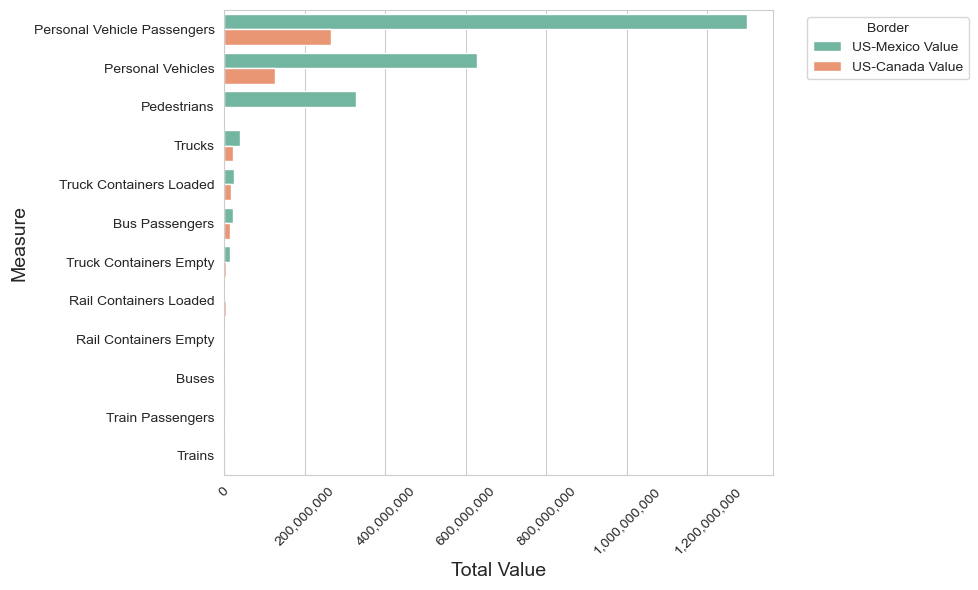

In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Assuming you already have the 'activity_comparison' dataframe
# Let's melt the data for plotting
melted_data = activity_comparison.melt(id_vars="Measure", var_name="Border", value_name="Value")
melted_data = melted_data.sort_values("Value", ascending=False)

# Create a bar plot (Horizontal)
plt.figure(figsize=(10, 6))
sns.barplot(data=melted_data, y="Measure", x="Value", hue="Border", orient="h", palette="Set2")

# Formatting axis labels and title
plt.xlabel("Total Value", fontsize=14)
plt.ylabel("Measure", fontsize=14)
plt.legend(title="Border", bbox_to_anchor=(1.05, 1), loc='upper left')

# Format the x-axis to show full numbers without scientific notation
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

# Slant x-axis ticks
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout() 
plt.savefig("measure_compare.png", dpi=300, bbox_inches="tight")
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


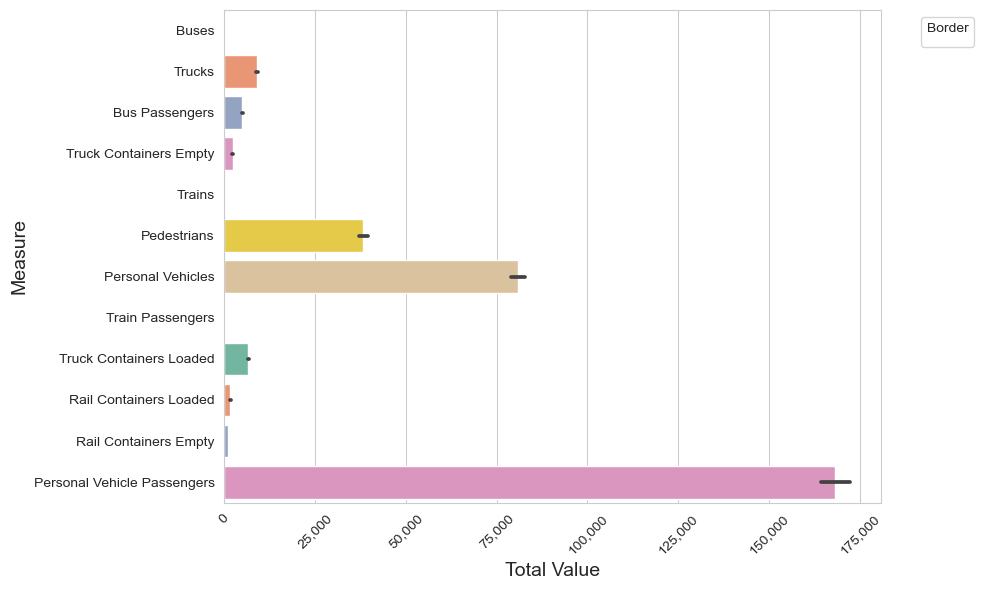

In [111]:
# Create a bar plot (Horizontal)
plt.figure(figsize=(10, 6))
sns.barplot(data=border_data, y="Measure", x="Value", orient="h", palette="Set2")

# Formatting axis labels and title
plt.xlabel("Total Value", fontsize=14)
plt.ylabel("Measure", fontsize=14)
plt.legend(title="Border", bbox_to_anchor=(1.05, 1), loc='upper left')

# Format the x-axis to show full numbers without scientific notation
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

# Slant x-axis ticks
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout() 
plt.savefig("measure_compare.png", dpi=300, bbox_inches="tight")
plt.show()


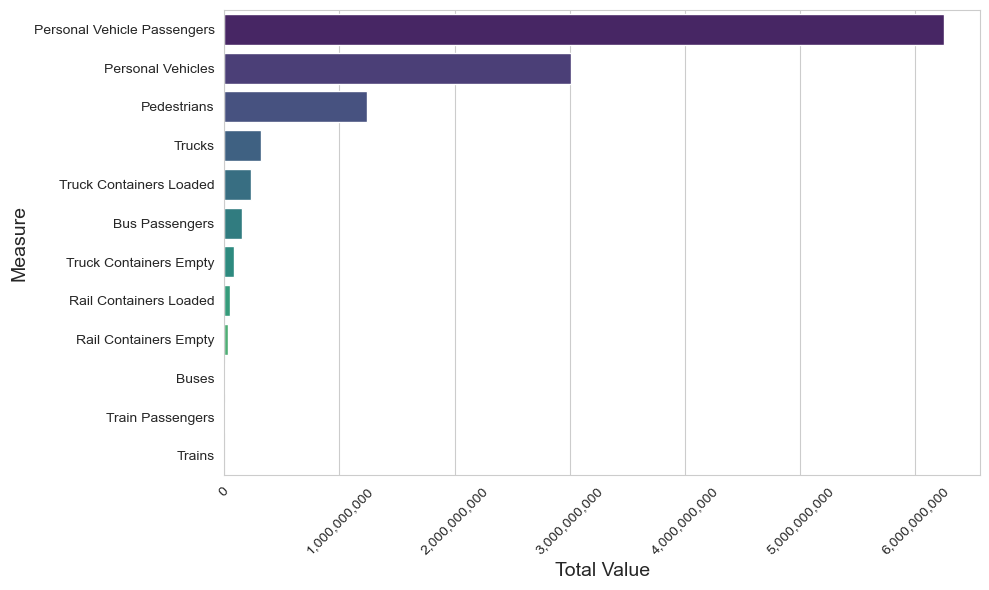

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Group by Measure and sum the Value
measure_totals = border_data.groupby("Measure")["Value"].sum().reset_index()

# Sort by value descending for clearer chart
measure_totals = measure_totals.sort_values("Value", ascending=False)

# Create horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=measure_totals, y="Measure", x="Value", palette="viridis")

# Format the x-axis to show full numbers (not scientific notation)
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

# Add axis labels
plt.xlabel("Total Value", fontsize=14)
plt.ylabel("Measure", fontsize=14)

# Rotate ticks if needed
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig("measure_by_value.png", dpi=300, bbox_inches="tight")
plt.show()


In [113]:
total_value = border_data["Value"].sum()
print(f"Total Value: {total_value:,}")


Total Value: 11,383,189,161


In [114]:
# Filter only Trucks and Pedestrians
truck_pedestrian_data = border_data[border_data["Measure"].isin(["Trucks", "Pedestrians", "Personal Vehicles"])]

# Group by Border and Measure, then sum the total Value
summary = (
    truck_pedestrian_data.groupby(["Border", "Measure"])["Value"]
    .sum()
    .reset_index()
    .sort_values("Value", ascending=False)
)


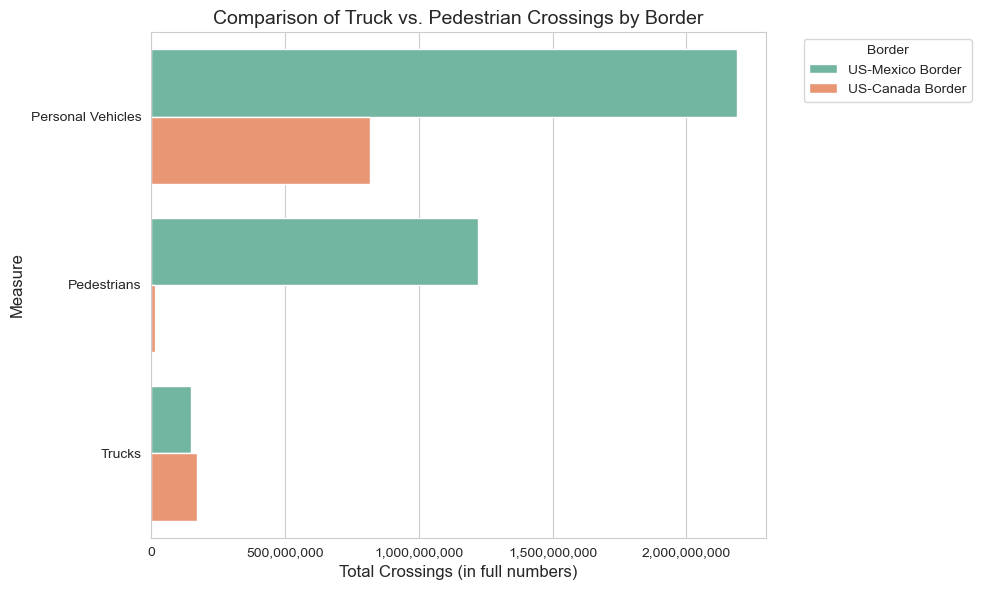

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(10, 6))
sns.barplot(data=summary, x="Value", y="Measure", hue="Border", palette="Set2", orient="h")

# Format the x-axis to show full numbers
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.xlabel("Total Crossings (in full numbers)", fontsize=12)
plt.ylabel("Measure", fontsize=12)
plt.title("Comparison of Truck vs. Pedestrian Crossings by Border", fontsize=14)
plt.legend(title="Border", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


In [116]:
# Filter for Niagara Falls-related ports
niagara_data = border_data[border_data["Port Name"].str.contains("Buffalo Niagara Falls", case=False)]

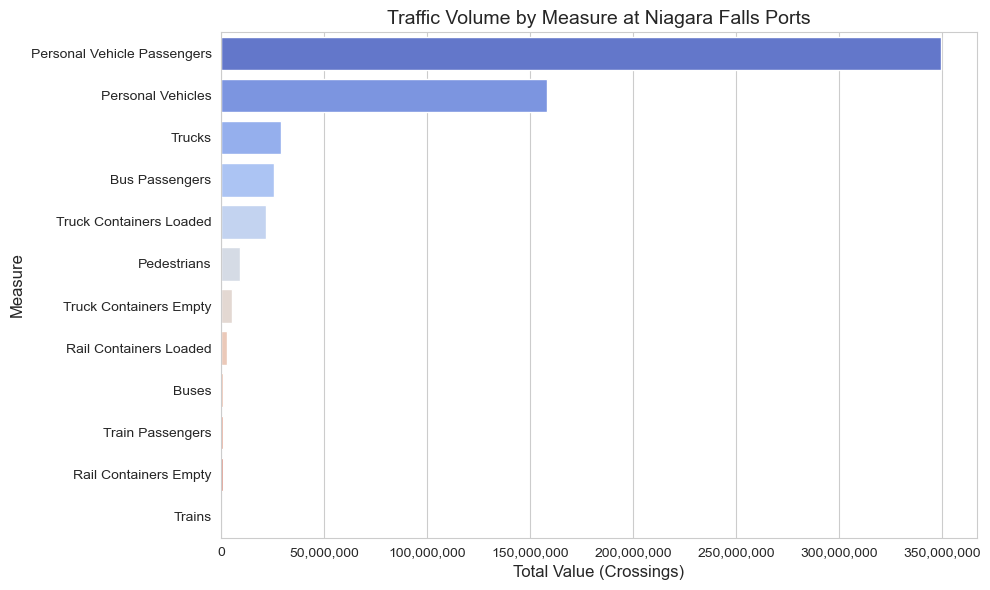

In [117]:
# Group by Measure for Niagara
niagara_summary = (
    niagara_data.groupby("Measure")["Value"]
    .sum()
    .reset_index()
    .sort_values("Value", ascending=False)
)
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(10, 6))
sns.barplot(data=niagara_summary, y="Measure", x="Value", palette="coolwarm", orient="h")

plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.title("Traffic Volume by Measure at Niagara Falls Ports", fontsize=14)
plt.xlabel("Total Value (Crossings)", fontsize=12)
plt.ylabel("Measure", fontsize=12)
plt.tight_layout()
plt.show()


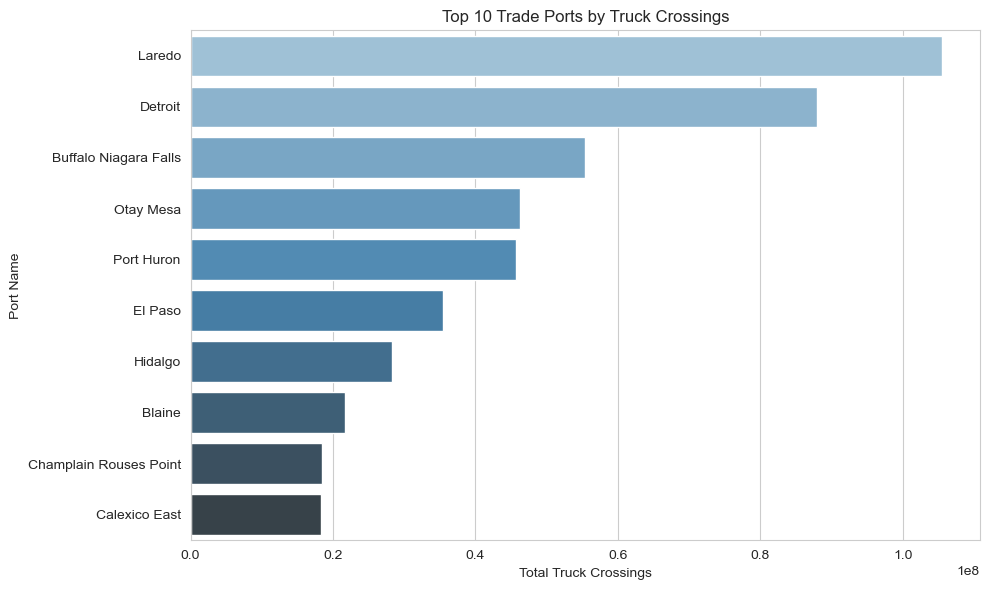

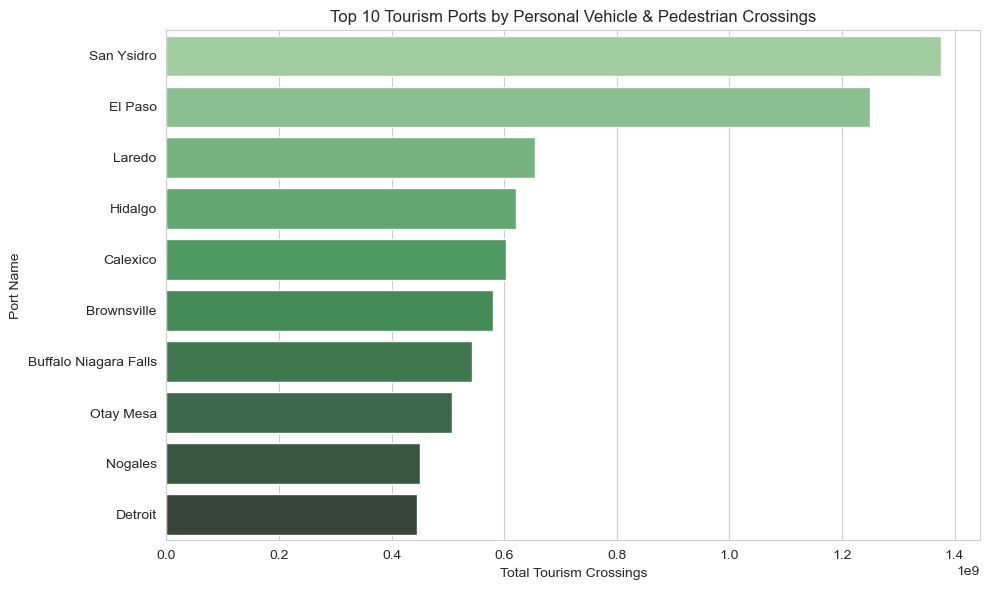

In [118]:
port_measure_totals = (
    border_data.groupby(["Port Name", "Measure"])["Value"]
    .sum()
    .reset_index()
)
def classify_measure(measure):
    if "Truck" in measure:
        return "Trade"
    elif any(x in measure for x in ["Personal Vehicle", "Passenger", "Pedestrian"]):
        return "Tourism"
    else:
        return "Other"

port_measure_totals["Category"] = port_measure_totals["Measure"].apply(classify_measure)
def classify_measure(measure):
    if "Truck" in measure:
        return "Trade"
    elif any(x in measure for x in ["Personal Vehicle", "Passenger", "Pedestrian"]):
        return "Tourism"
    else:
        return "Other"

port_measure_totals["Category"] = port_measure_totals["Measure"].apply(classify_measure)
category_totals = (
    port_measure_totals.groupby(["Port Name", "Category"])["Value"]
    .sum()
    .reset_index()
)
pivot = category_totals.pivot(index="Port Name", columns="Category", values="Value").fillna(0)
top_trade_ports = pivot.sort_values("Trade", ascending=False).head(10)
top_tourism_ports = pivot.sort_values("Tourism", ascending=False).head(10)
import matplotlib.pyplot as plt
import seaborn as sns

# Top Trade Ports
plt.figure(figsize=(10,6))
sns.barplot(x=top_trade_ports["Trade"], y=top_trade_ports.index, palette="Blues_d")
plt.title("Top 10 Trade Ports by Truck Crossings")
plt.xlabel("Total Truck Crossings")
plt.ylabel("Port Name")
plt.tight_layout()
plt.show()

# Top Tourism Ports
plt.figure(figsize=(10,6))
sns.barplot(x=top_tourism_ports["Tourism"], y=top_tourism_ports.index, palette="Greens_d")
plt.title("Top 10 Tourism Ports by Personal Vehicle & Pedestrian Crossings")
plt.xlabel("Total Tourism Crossings")
plt.ylabel("Port Name")
plt.tight_layout()
plt.show()


In [119]:
def classify_measure(measure):
    trade_keywords = ["Truck", "Truck Containers Loaded", "Truck Containers Empty"]
    tourism_keywords = ["Personal Vehicle", "Pedestrian"]

    if any(keyword in measure for keyword in trade_keywords):
        return "Trade"
    elif any(keyword in measure for keyword in tourism_keywords):
        return "Tourism"
    else:
        return "Other"
port_measure_totals["Category"] = port_measure_totals["Measure"].apply(classify_measure)
category_totals = (
    port_measure_totals.groupby(["Port Name", "Category"])["Value"]
    .sum()
    .reset_index()
)

pivot = category_totals.pivot(index="Port Name", columns="Category", values="Value").fillna(0)
pivot["Total"] = pivot["Trade"] + pivot["Tourism"]
pivot_sorted = pivot.sort_values("Total", ascending=False)


In [120]:
pivot.loc["Buffalo Niagara Falls"]  # Replace with any port name


Category
Other       31011231.0
Tourism    516503527.0
Trade       55416437.0
Total      571919964.0
Name: Buffalo Niagara Falls, dtype: float64

In [121]:
# Get unique port-state combinations
port_states = border_data[["Port Name", "state"]].drop_duplicates()

# Merge with pivot to include State
pivot = pivot.reset_index().merge(port_states, on="Port Name", how="left")

# Create a combined label
pivot["Port (State)"] = pivot["Port Name"] + " (" + pivot["state"] + ")"
top_trade_ports = pivot.sort_values("Trade", ascending=False).head(10)


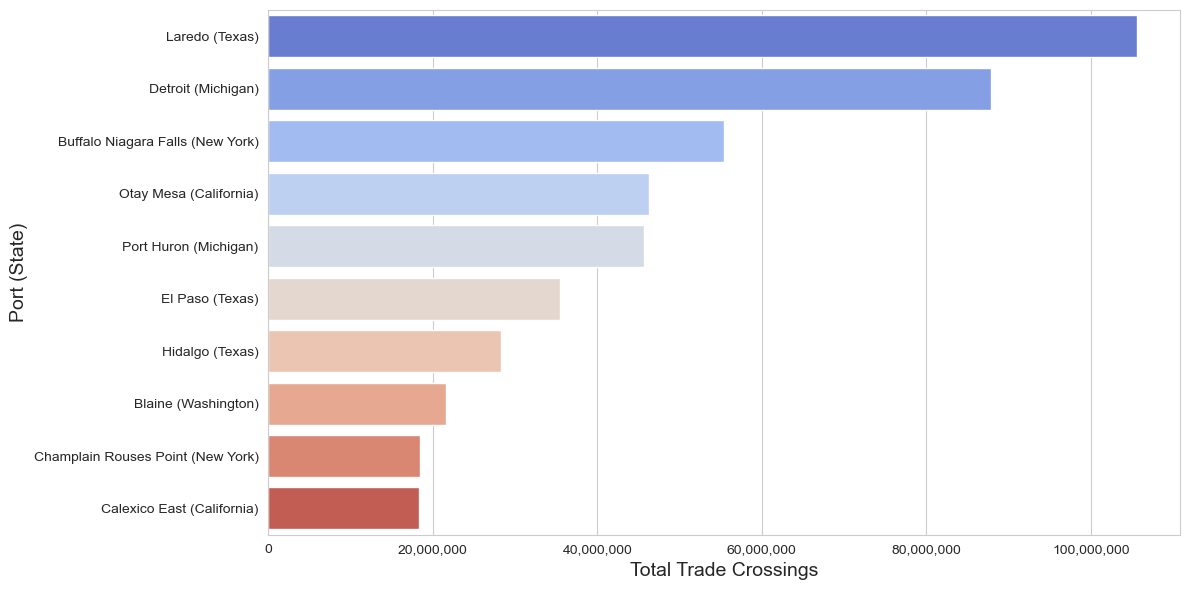

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(12, 6))
sns.barplot(x="Trade", y="Port (State)", data=top_trade_ports, palette="coolwarm")

#plt.title("Top 10 Ports by Trade Activity (Trucks + Containers)", fontsize=16)
plt.xlabel("Total Trade Crossings", fontsize=14)
plt.ylabel("Port (State)", fontsize=14)

# Format x-axis with full numbers (no scientific notation)
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()


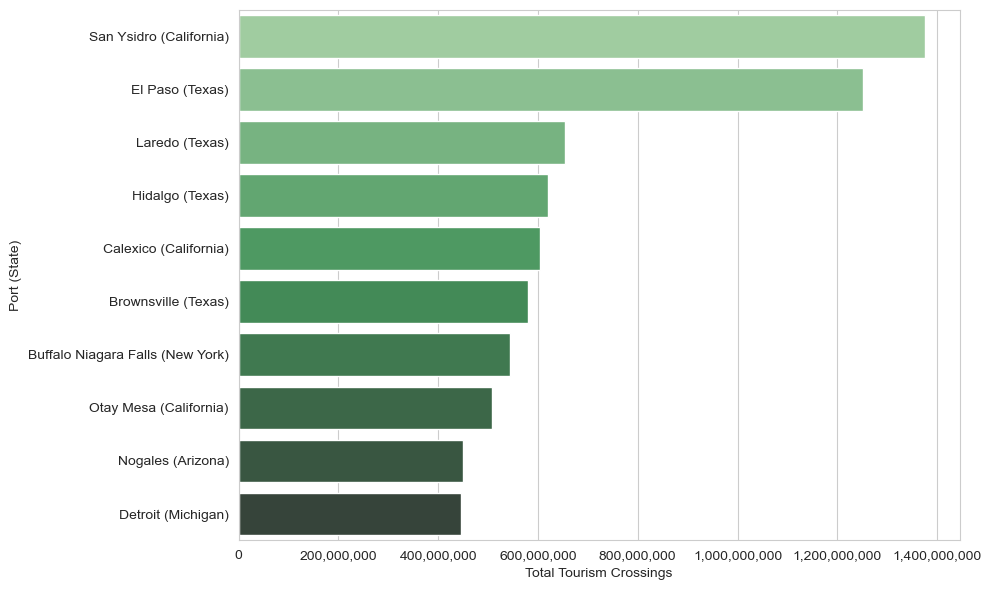

In [123]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import seaborn as sns

# Merge to get state info (if not already included)
port_states = border_data[["Port Name", "state"]].drop_duplicates()
top_tourism_ports = top_tourism_ports.reset_index().merge(port_states, on="Port Name", how="left")

# Create label with state
top_tourism_ports["Port (State)"] = top_tourism_ports["Port Name"] + " (" + top_tourism_ports["state"] + ")"

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x="Tourism",
    y="Port (State)",
    data=top_tourism_ports.sort_values("Tourism", ascending=False),
    palette="Greens_d"
)
#plt.title("Top 10 Tourism Ports by Personal Vehicle & Pedestrian Crossings")
plt.xlabel("Total Tourism Crossings")
plt.ylabel("Port (State)")

# Format x-axis numbers
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()


# Training and Testing Count Model

In [135]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Ensure categorical types
for col in ['Border', 'Measure', 'Month', 'Year', 'state', 'Port Name']:
    df_merged[col] = df_merged[col].astype('category')

# Subset for U.S.-Mexico Border
df_mexico = df_merged[df_merged['Border'] == 'US-Mexico Border'].copy()

# Split into train/test
train, test = train_test_split(df_mexico, test_size=0.2, random_state=42)

# Fit model on training data
model_mexico = smf.glm(
    formula='Value ~ Measure + Month + Year + disaster_count',
    data=train,
    family=sm.families.Poisson()
).fit()

# Predict on test data
test['predicted'] = model_mexico.predict(test)

# Evaluate
rmse = np.sqrt(mean_squared_error(test['Value'], test['predicted']))
mae = mean_absolute_error(test['Value'], test['predicted'])

print("=== Poisson GLM for U.S.-Mexico Border ===")
print(model_mexico.summary())
print(f"\nTest RMSE: {rmse:.2f}")
print(f"Test MAE: {mae:.2f}")


=== Poisson GLM for U.S.-Mexico Border ===
                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Value   No. Observations:                74452
Model:                            GLM   Df Residuals:                    74400
Model Family:                 Poisson   Df Model:                           51
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -4.1483e+09
Date:                Sun, 11 May 2025   Deviance:                   8.2961e+09
Time:                        21:30:34   Pearson chi2:                 1.07e+10
No. Iterations:                    14   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------

In [136]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Ensure categorical types
for col in ['Border', 'Measure', 'Month', 'Year', 'state', 'Port Name']:
    df_merged[col] = df_merged[col].astype('category')

# Subset for U.S.-Mexico Border
df_canada = df_merged[df_merged['Border'] == 'US-Canada Border'].copy()

# Split into train/test
train, test = train_test_split(df_canada, test_size=0.2, random_state=42)

# Fit model on training data
model_canada = smf.glm(
    formula='Value ~ Measure + Month + Year + disaster_count',
    data=train,
    family=sm.families.Poisson()
).fit()

# Predict on test data
test['predicted'] = model_canada.predict(test)

# Evaluate
rmse = np.sqrt(mean_squared_error(test['Value'], test['predicted']))
mae = mean_absolute_error(test['Value'], test['predicted'])

print("=== Poisson GLM for U.S.-Mexico Border ===")
print(model_canada.summary())
print(f"\nTest RMSE: {rmse:.2f}")
print(f"Test MAE: {mae:.2f}")


=== Poisson GLM for U.S.-Mexico Border ===
                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Value   No. Observations:               241440
Model:                            GLM   Df Residuals:                   241388
Model Family:                 Poisson   Df Model:                           51
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -3.7530e+09
Date:                Sun, 11 May 2025   Deviance:                   7.5046e+09
Time:                        21:31:18   Pearson chi2:                 2.04e+10
No. Iterations:                    15   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------

In [141]:
from sklearn.model_selection import train_test_split
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.genmod.families import NegativeBinomial
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# --- For Mexico ---
# Split into train/test
train_mex, test_mex = train_test_split(df_mexico, test_size=0.2, random_state=42)

# Fit Negative Binomial on training data
nb_model_mexico = smf.glm(
    formula='Value ~ Measure + Month + disaster_count',
    data=train_mex,
    family=NegativeBinomial()
).fit()

# Predict on test set
pred_mex = nb_model_mexico.predict(test_mex)

# Evaluation metrics
rmse_mex = np.sqrt(mean_squared_error(test_mex["Value"], pred_mex))
mae_mex = mean_absolute_error(test_mex["Value"], pred_mex)
r2_mex = r2_score(test_mex["Value"], pred_mex)

print("=== Mexico Model ===")
print(nb_model_mexico.summary())
print(f"Test RMSE: {rmse_mex:,.2f}")
print(f"Test MAE: {mae_mex:,.2f}")
print(f"Test R²: {r2_mex:.4f}")

# --- For Canada ---
train_can, test_can = train_test_split(df_canada, test_size=0.2, random_state=42)

nb_model_canada = smf.glm(
    formula='Value ~ Measure + Month + disaster_count',
    data=train_can,
    family=NegativeBinomial()
).fit()

pred_can = nb_model_canada.predict(test_can)

rmse_can = np.sqrt(mean_squared_error(test_can["Value"], pred_can))
mae_can = mean_absolute_error(test_can["Value"], pred_can)
r2_can = r2_score(test_can["Value"], pred_can)

print("\n=== Canada Model ===")
print(nb_model_canada.summary())
print(f"Test RMSE: {rmse_can:,.2f}")
print(f"Test MAE: {mae_can:,.2f}")
print(f"Test R²: {r2_can:.4f}")


=== Mexico Model ===
                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Value   No. Observations:                74452
Model:                            GLM   Df Residuals:                    74428
Model Family:        NegativeBinomial   Df Model:                           23
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -7.3800e+05
Date:                Sun, 11 May 2025   Deviance:                   4.0679e+05
Time:                        21:57:20   Pearson chi2:                 5.16e+05
No. Iterations:                    20   Pseudo R-squ. (CS):             0.9931
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------

In [149]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from statsmodels.genmod.families import NegativeBinomial
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# --- Helper function ---
def summarize_exp_coefficients(results, label="Model"):
    coef = results.params
    conf = results.conf_int()
    conf.columns = ['2.5%', '97.5%']

    exp_coef = np.exp(coef)
    exp_conf = np.exp(conf)

    summary_df = pd.DataFrame({
        'exp(coef)': exp_coef,
        '[exp(0.025)]': exp_conf['2.5%'],
        '[exp(0.975)]': exp_conf['97.5%']
    })

    print(f"\nExponentiated Coefficients for {label}:")
    print(summary_df)

# --- For Mexico ---
# Split into train/test
train_mex, test_mex = train_test_split(df_mexico, test_size=0.2, random_state=42)

# Fit Negative Binomial on training data
nb_model_mexico = smf.glm(
    formula='Value ~ Measure + Month + disaster_count',
    data=train_mex,
    family=NegativeBinomial()
).fit()

# Predict on test set
pred_mex = nb_model_mexico.predict(test_mex)

# Evaluation metrics
rmse_mex = np.sqrt(mean_squared_error(test_mex["Value"], pred_mex))
mae_mex = mean_absolute_error(test_mex["Value"], pred_mex)
r2_mex = r2_score(test_mex["Value"], pred_mex)

# Output
print("=== Mexico Model ===")
print(nb_model_mexico.summary())
print(f"Test RMSE: {rmse_mex:,.2f}")
print(f"Test MAE: {mae_mex:,.2f}")
print(f"Test R²: {r2_mex:.4f}")

# Exponentiated Coefficients
summarize_exp_coefficients(nb_model_mexico, label="Mexico")

# --- For Canada ---
train_can, test_can = train_test_split(df_canada, test_size=0.2, random_state=42)

nb_model_canada = smf.glm(
    formula='Value ~ Measure + Month + disaster_count',
    data=train_can,
    family=NegativeBinomial()
).fit()

pred_can = nb_model_canada.predict(test_can)

rmse_can = np.sqrt(mean_squared_error(test_can["Value"], pred_can))
mae_can = mean_absolute_error(test_can["Value"], pred_can)
r2_can = r2_score(test_can["Value"], pred_can)

# Output
print("\n=== Canada Model ===")
print(nb_model_canada.summary())
print(f"Test RMSE: {rmse_can:,.2f}")
print(f"Test MAE: {mae_can:,.2f}")
print(f"Test R²: {r2_can:.4f}")

# Exponentiated Coefficients
summarize_exp_coefficients(nb_model_canada, label="Canada")


=== Mexico Model ===
                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Value   No. Observations:                74452
Model:                            GLM   Df Residuals:                    74428
Model Family:        NegativeBinomial   Df Model:                           23
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -7.3800e+05
Date:                Sun, 11 May 2025   Deviance:                   4.0679e+05
Time:                        22:25:32   Pearson chi2:                 5.16e+05
No. Iterations:                    20   Pseudo R-squ. (CS):             0.9931
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------